In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!pip install sweetviz
import sweetviz as sv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 923.5 kB/s eta 0:00:00a 0:00:01


In [22]:
url = 'https://raw.githubusercontent.com/Fairtexas5/House_Predictor/refs/heads/main/csv/train.csv'
df = pd.read_csv(url)

In [24]:
print(df)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

                                             |          | [  0%]   00:00 -> (? left)


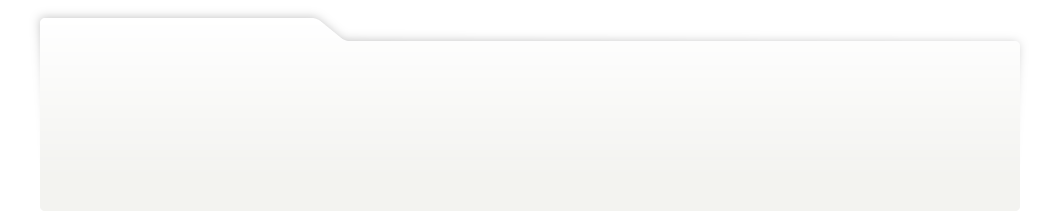
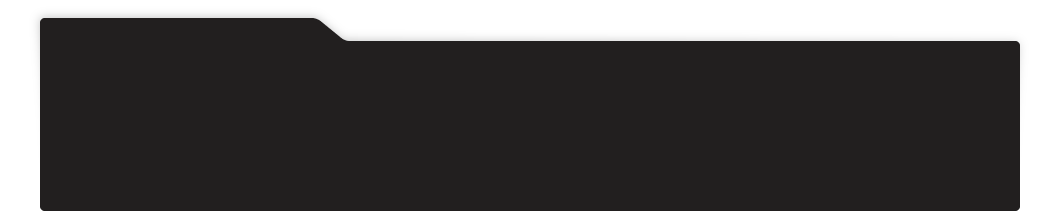
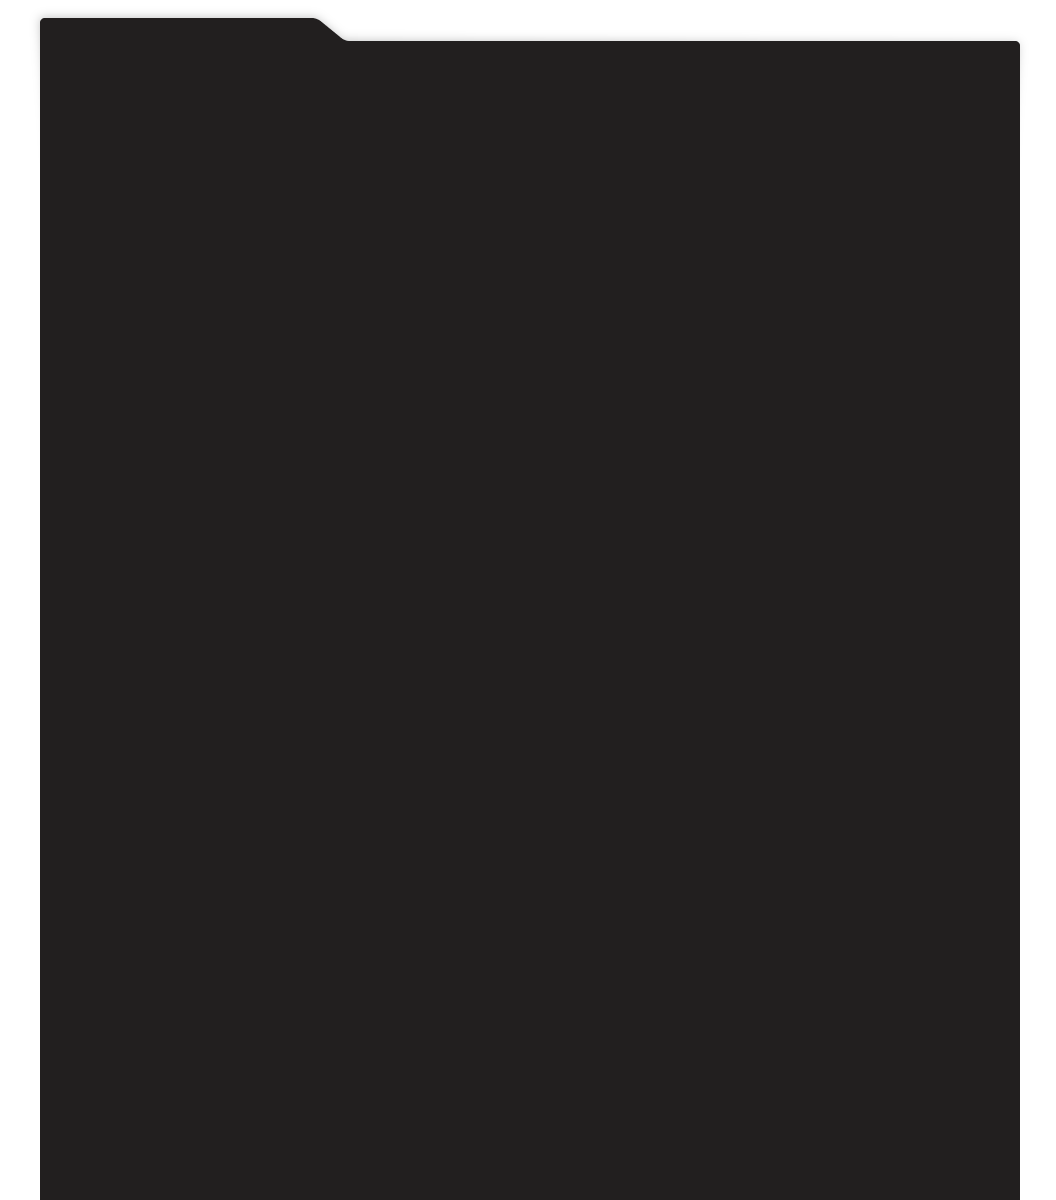
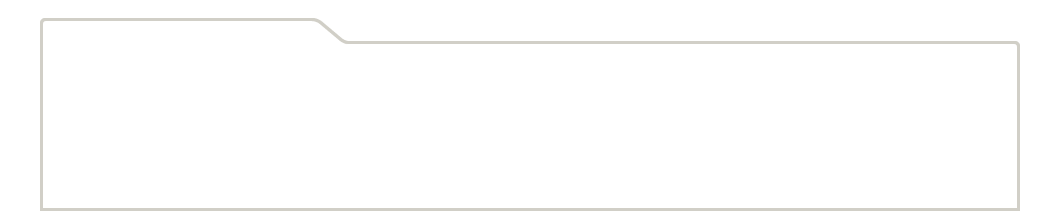
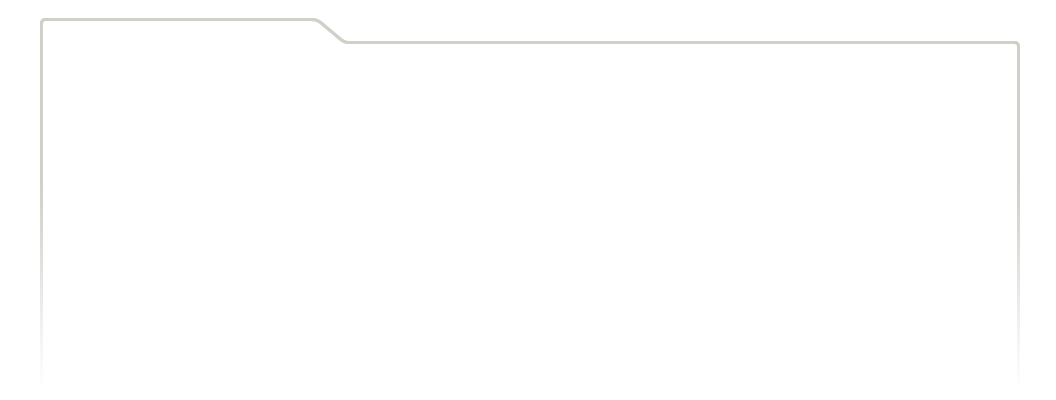
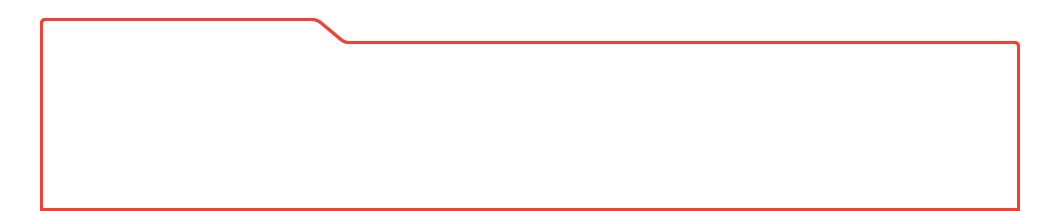
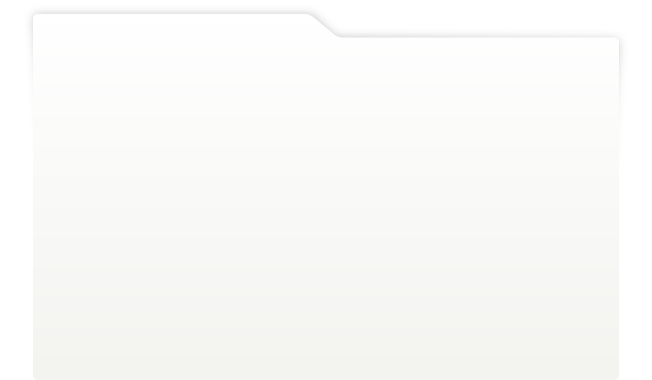
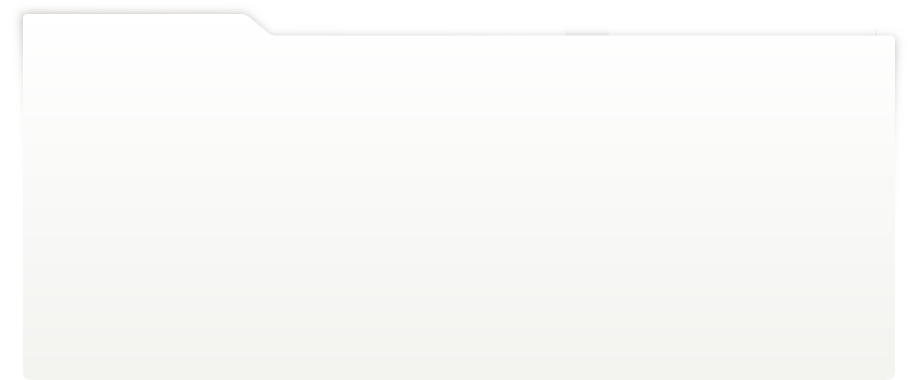
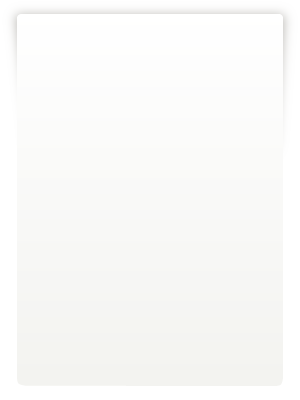
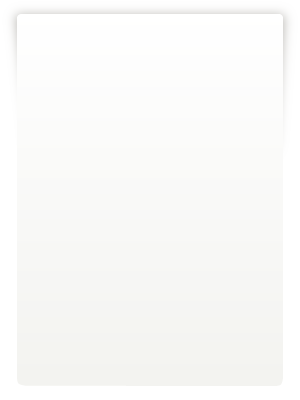
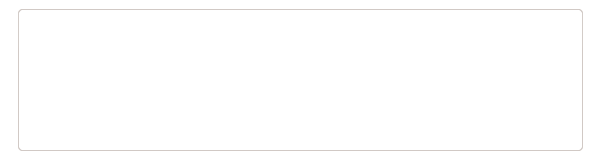
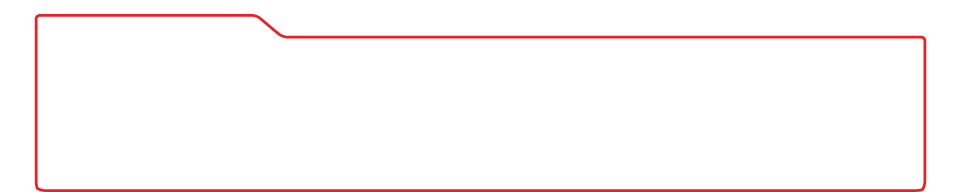
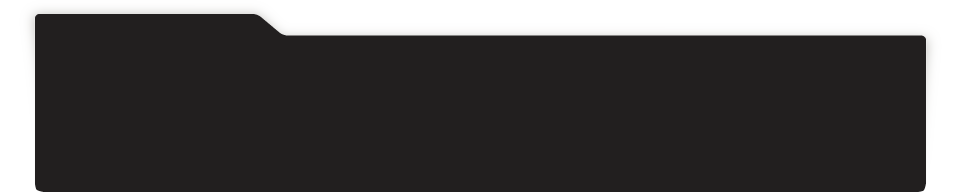
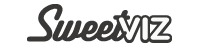
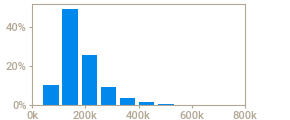
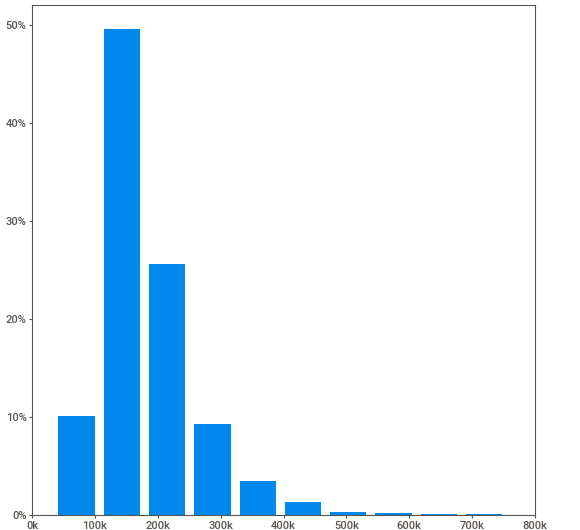
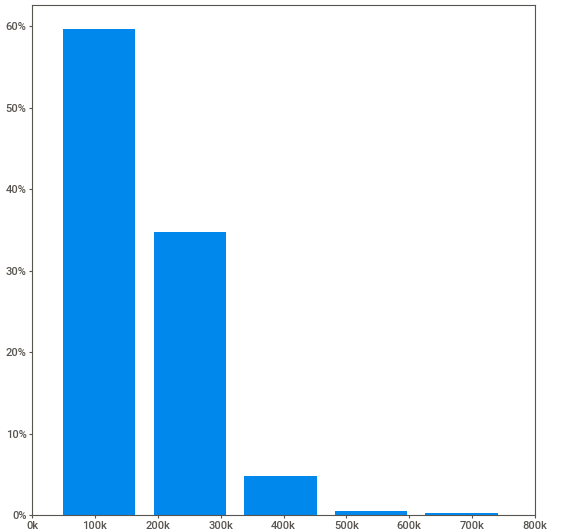
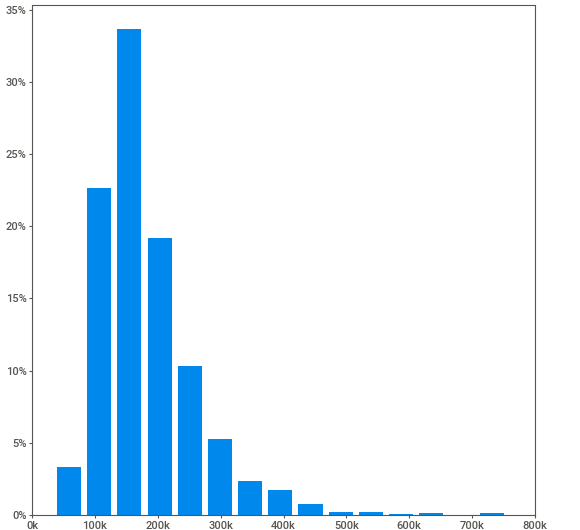
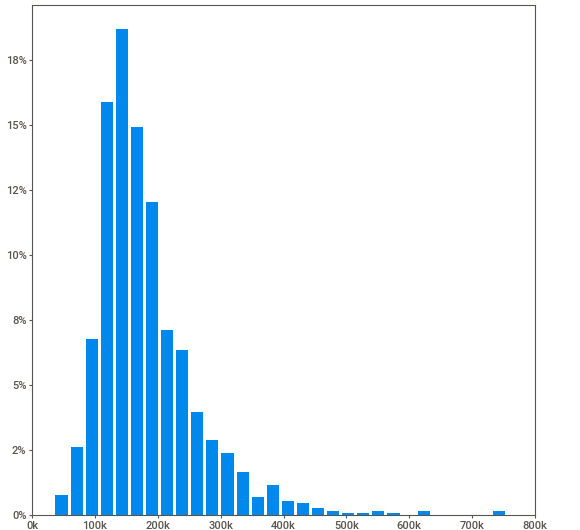
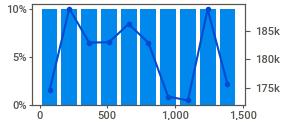
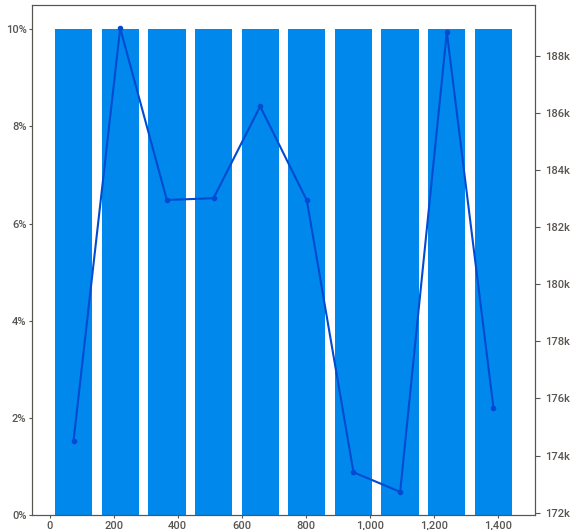
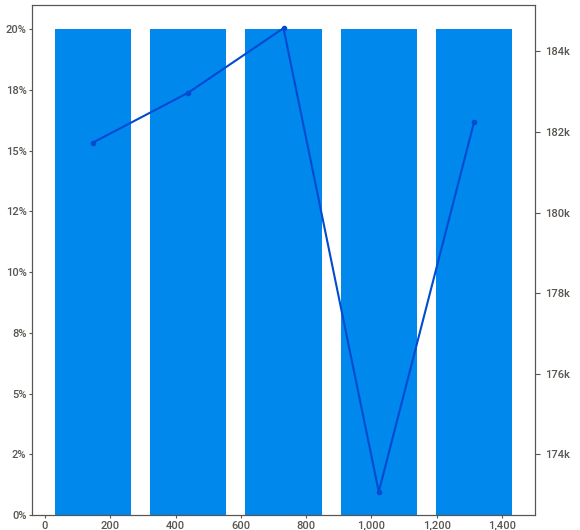
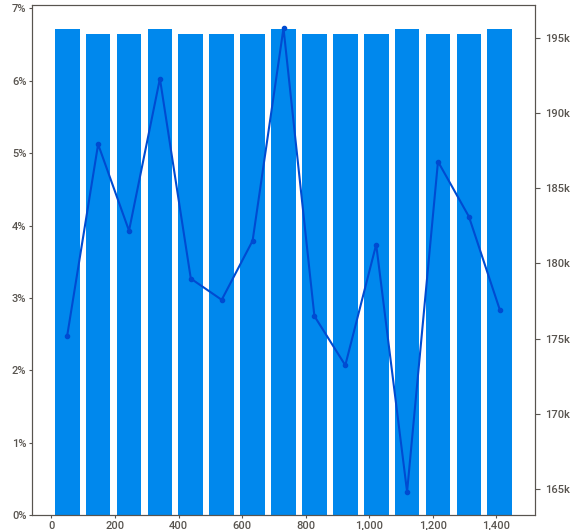
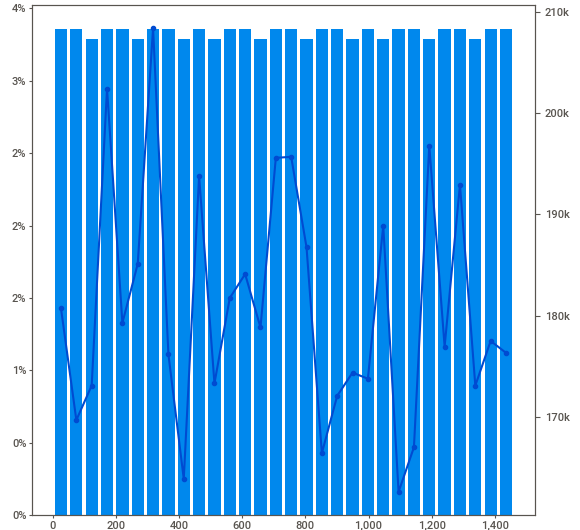
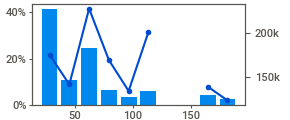
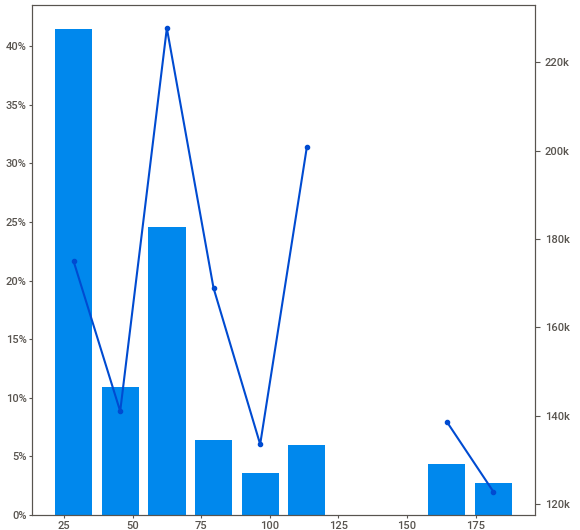
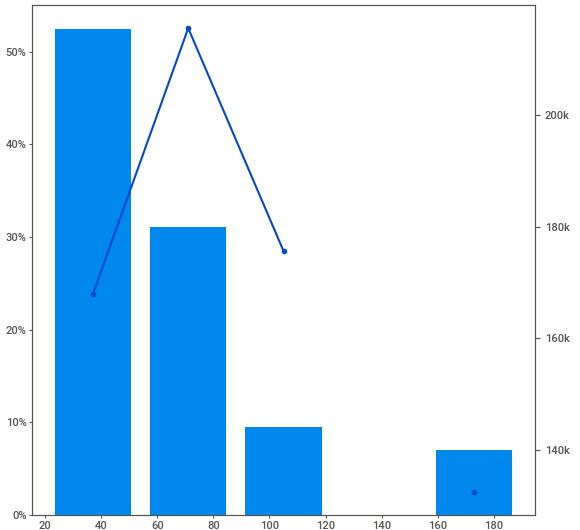
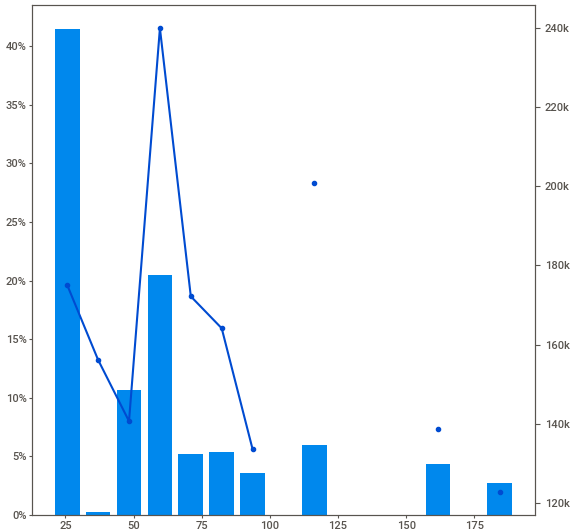
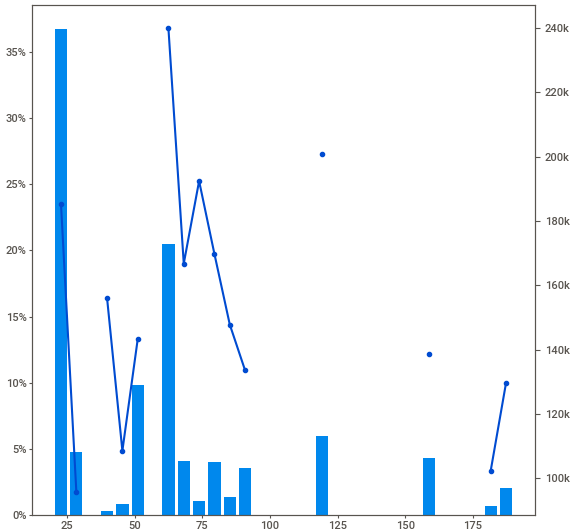
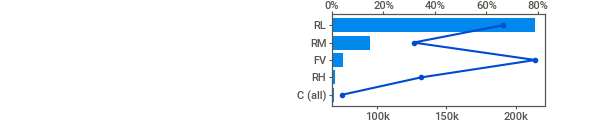
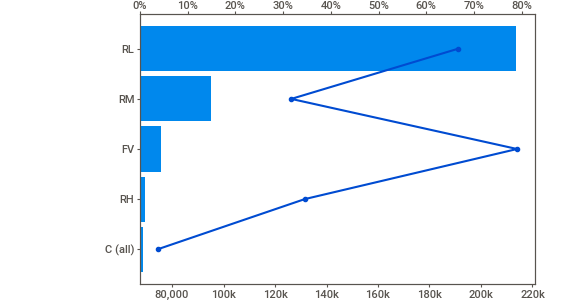
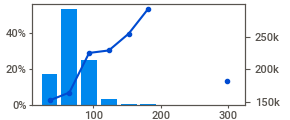
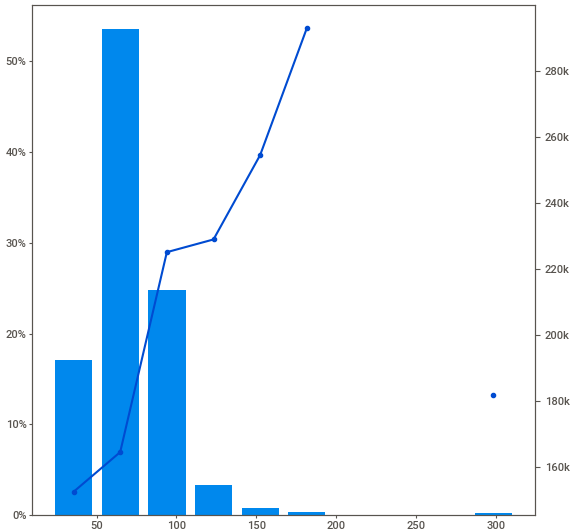
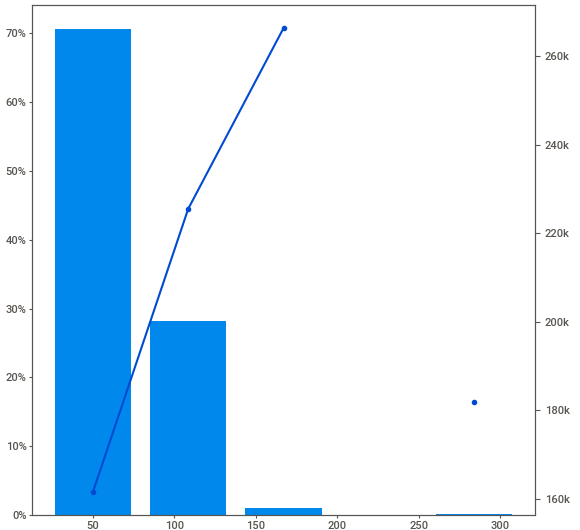
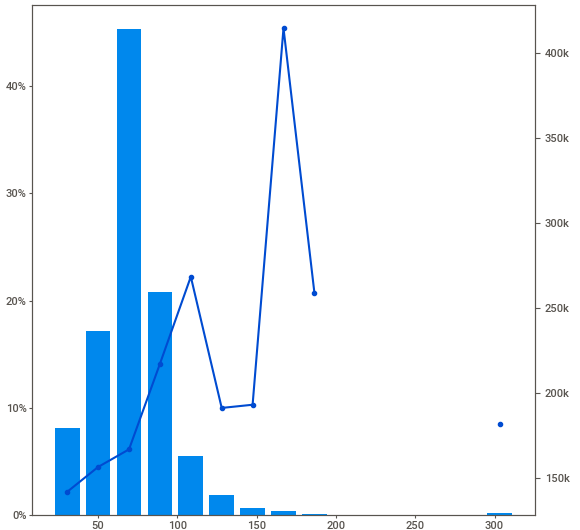
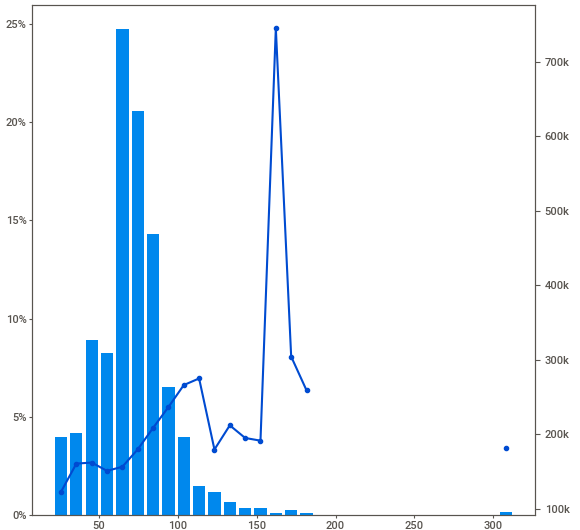
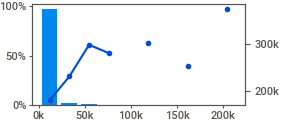
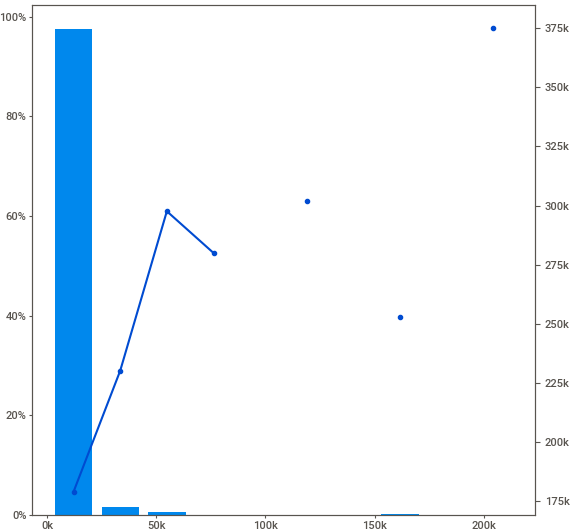
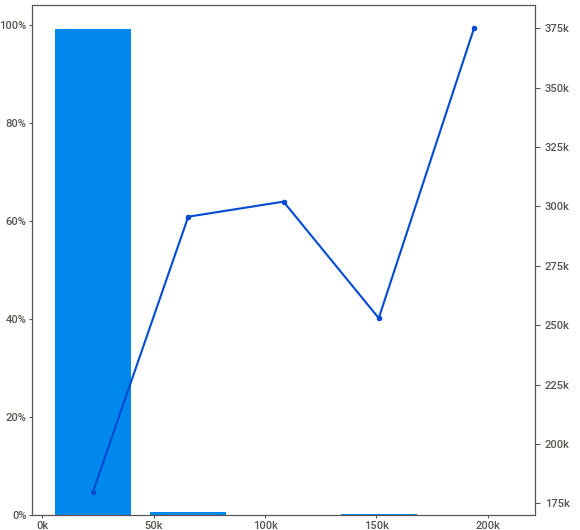
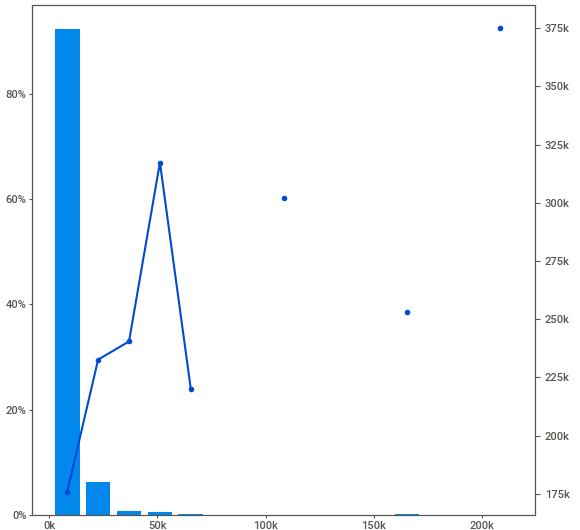
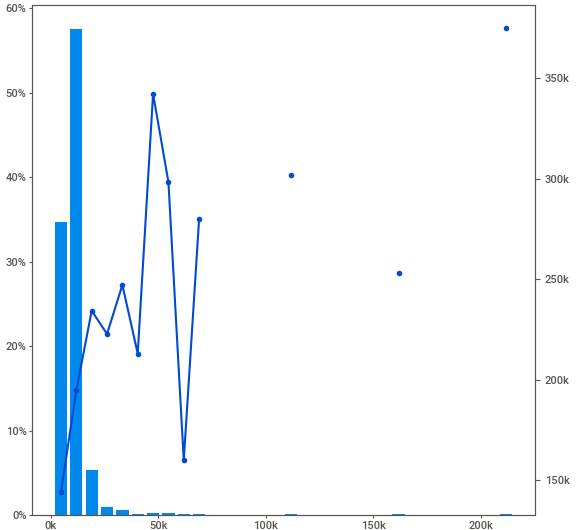
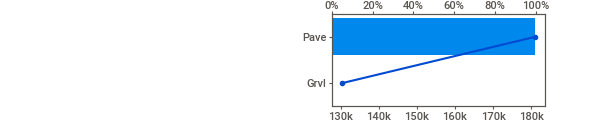
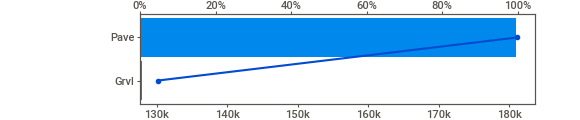
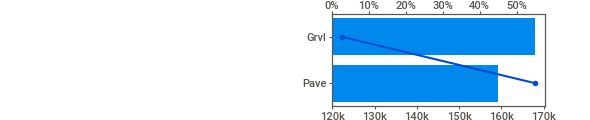
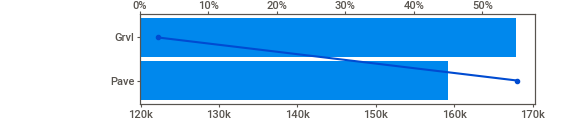
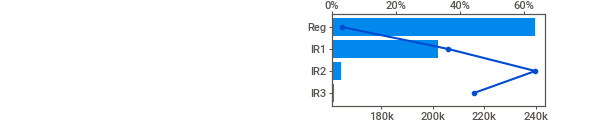
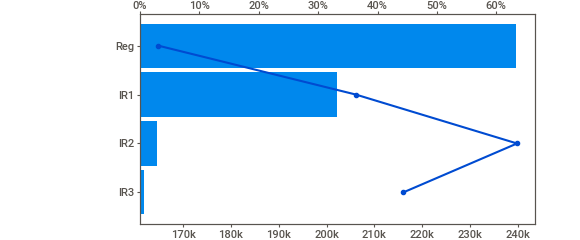
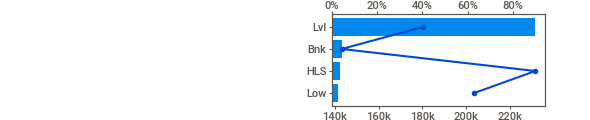
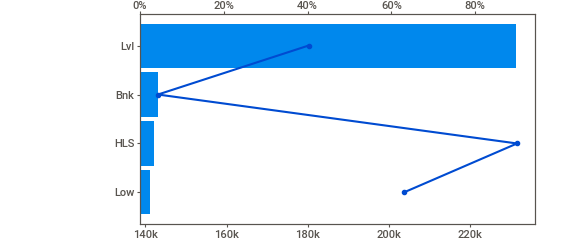
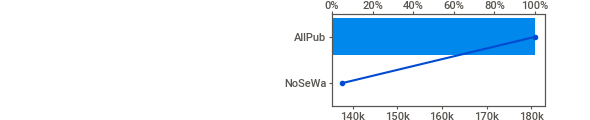
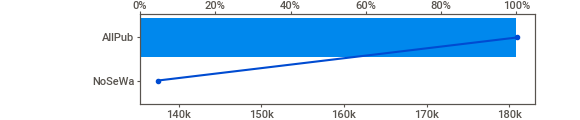
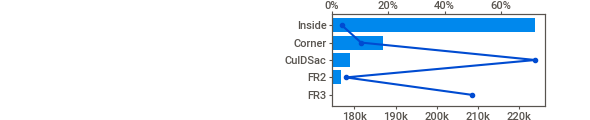
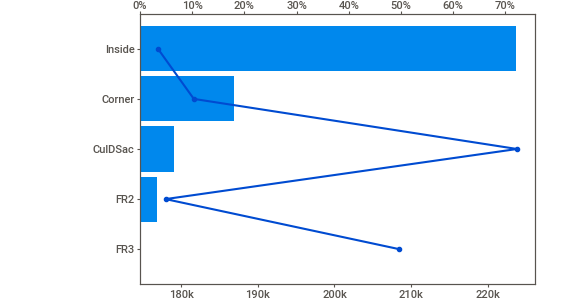
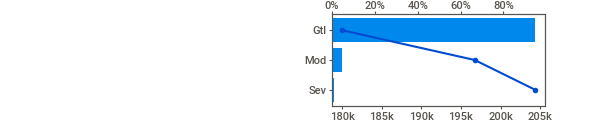
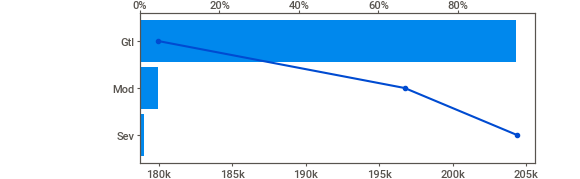
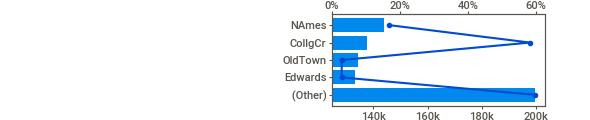
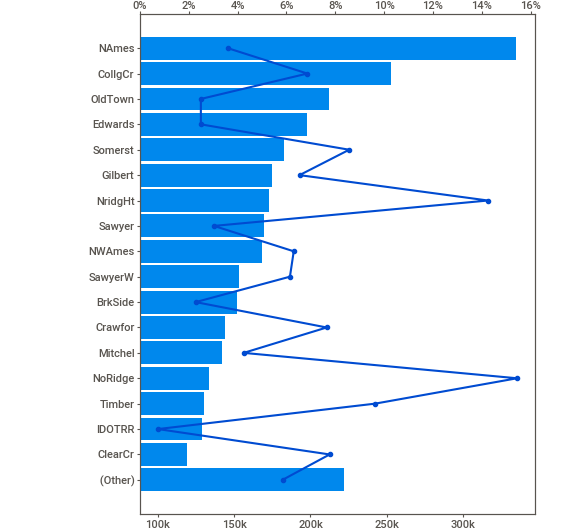
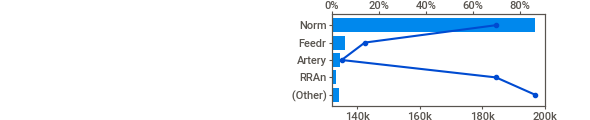
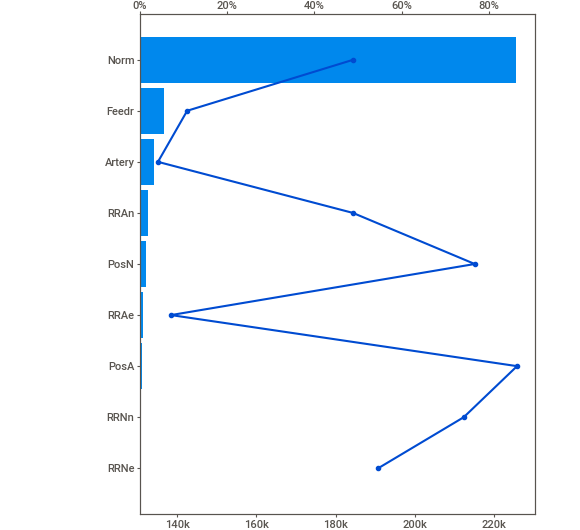
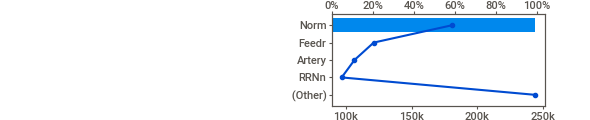
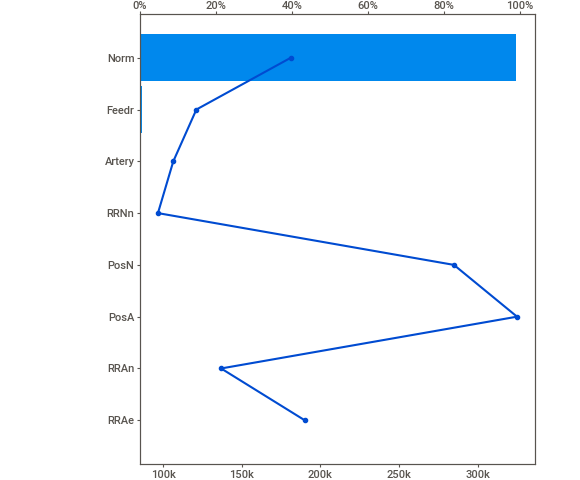
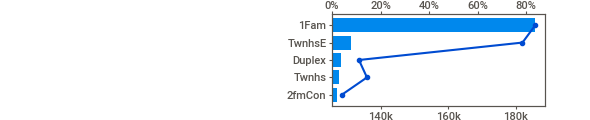
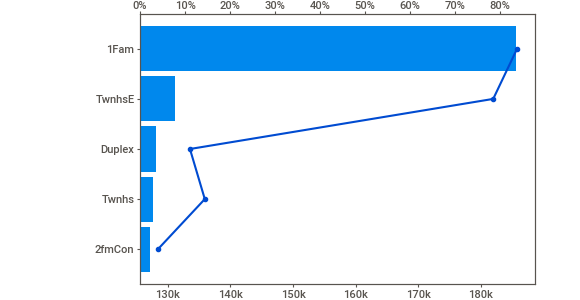
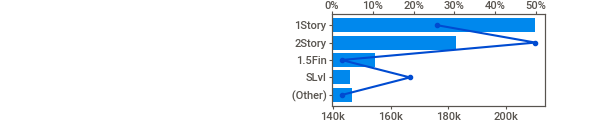
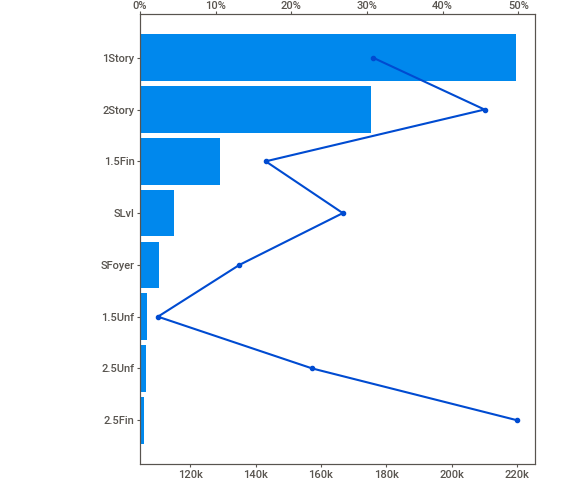
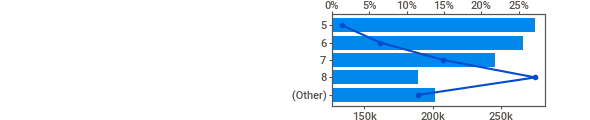
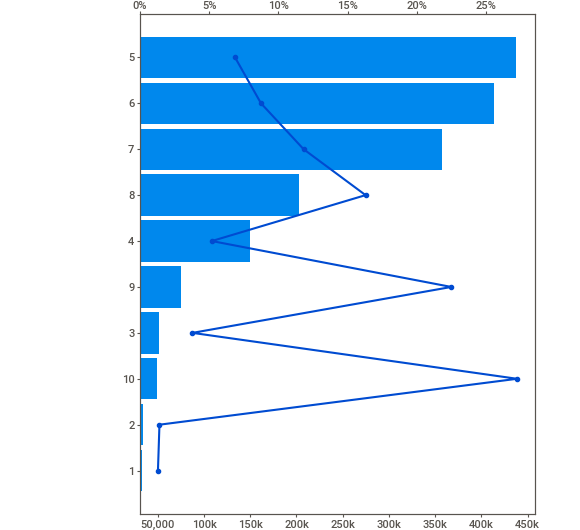
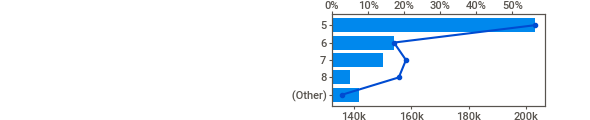
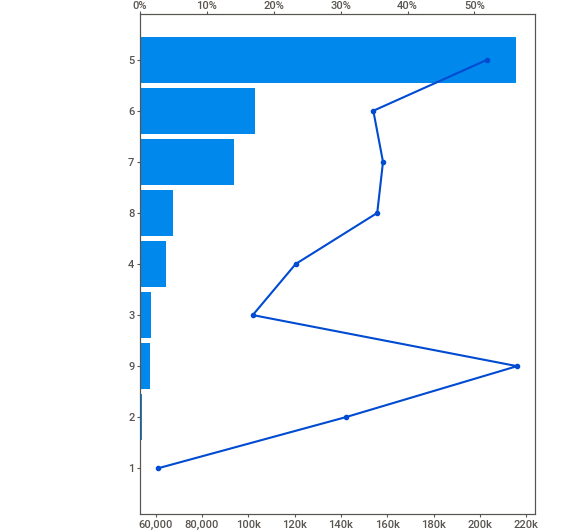
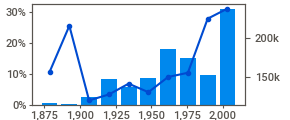
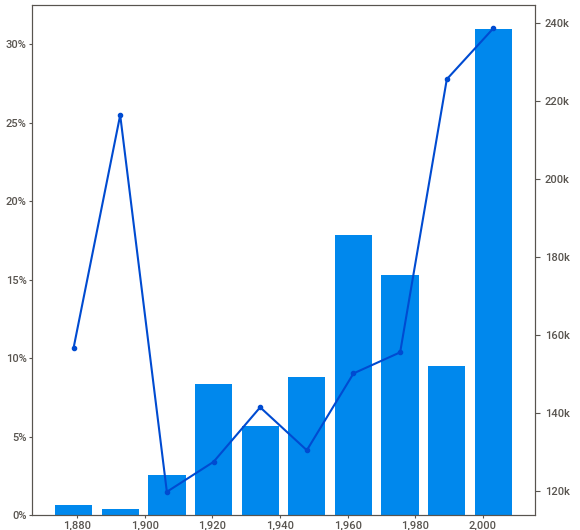
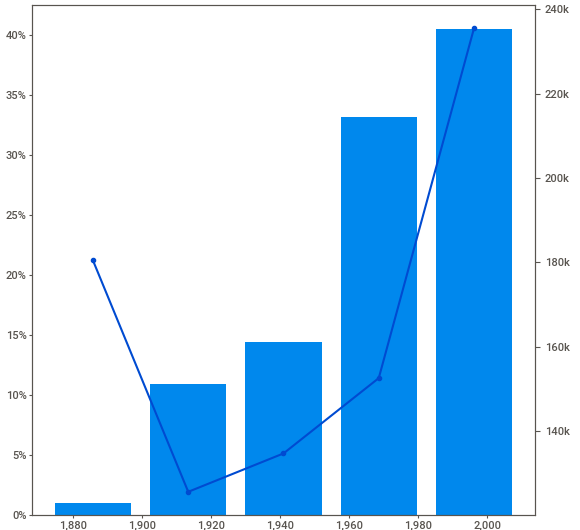
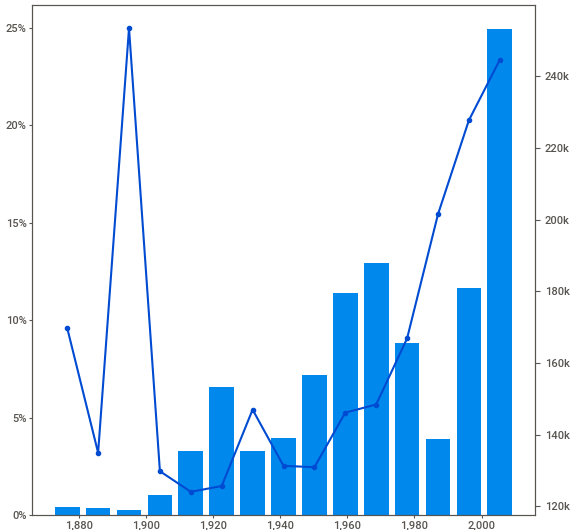
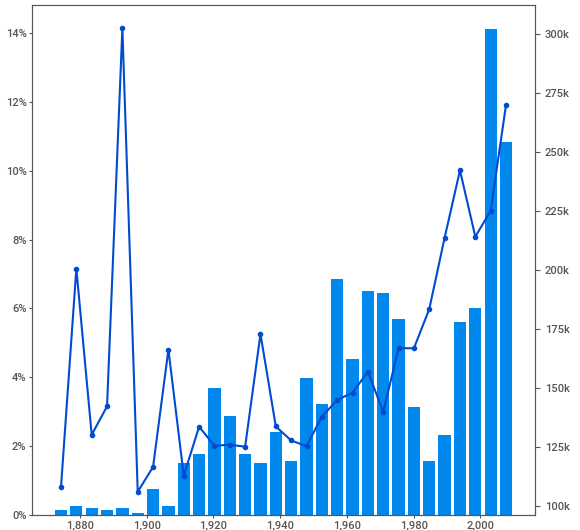
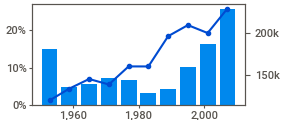
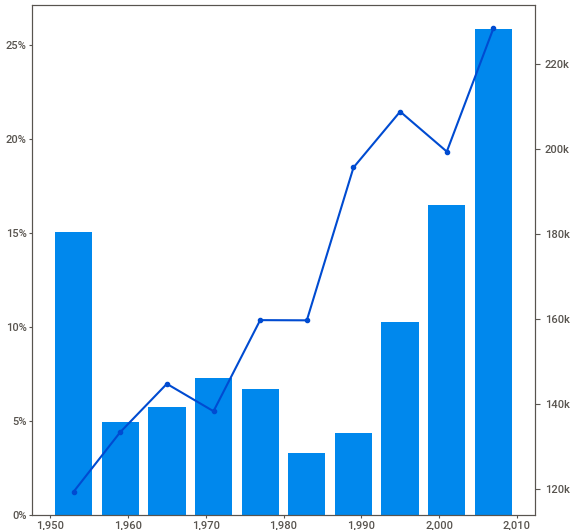
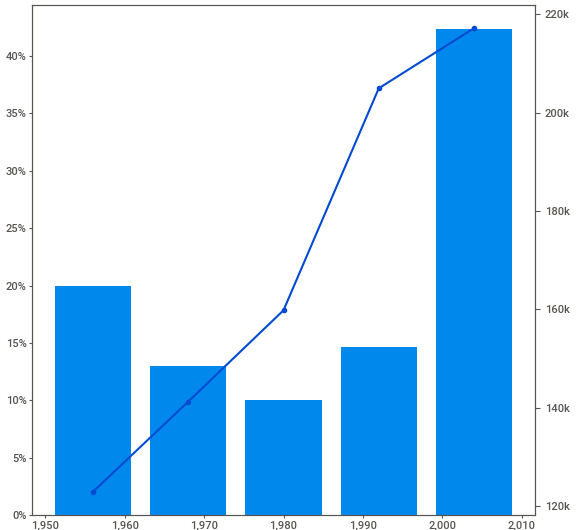
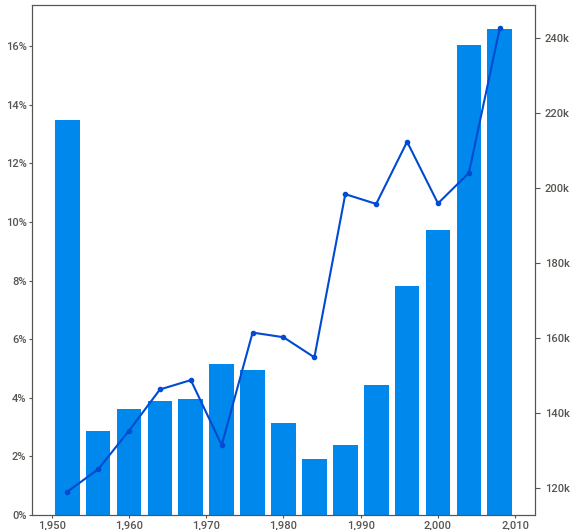
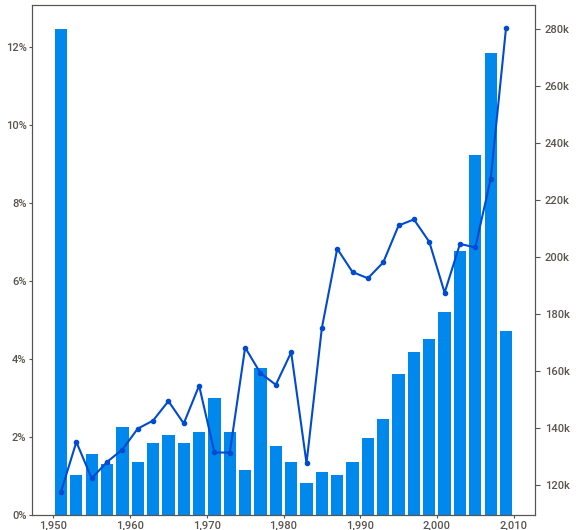
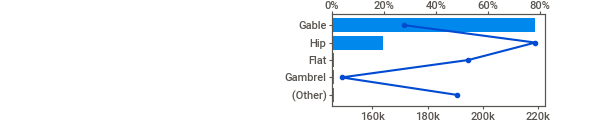
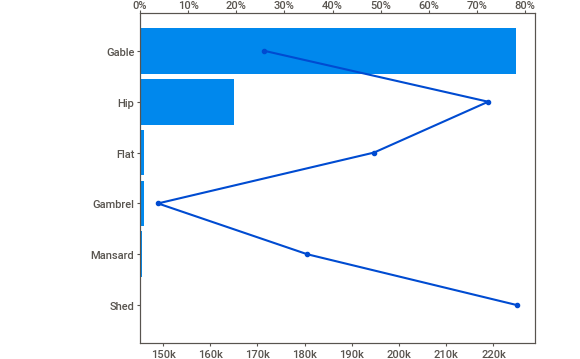
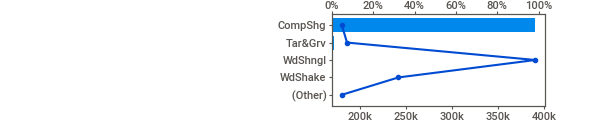
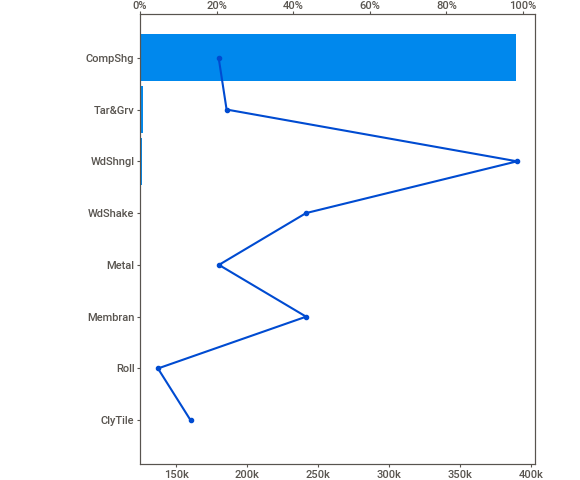
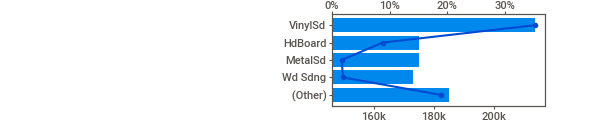
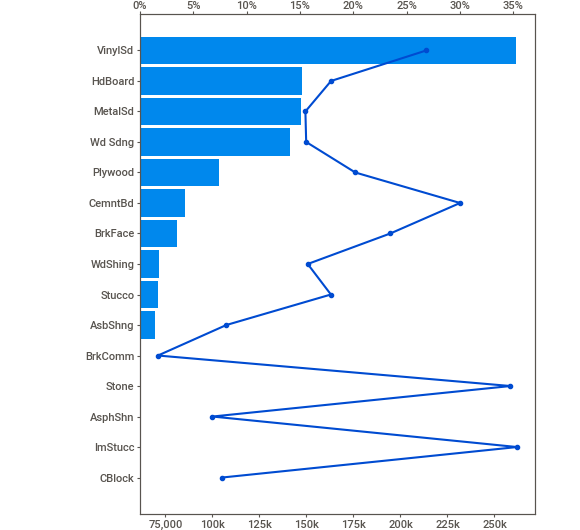
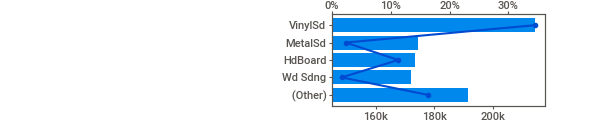
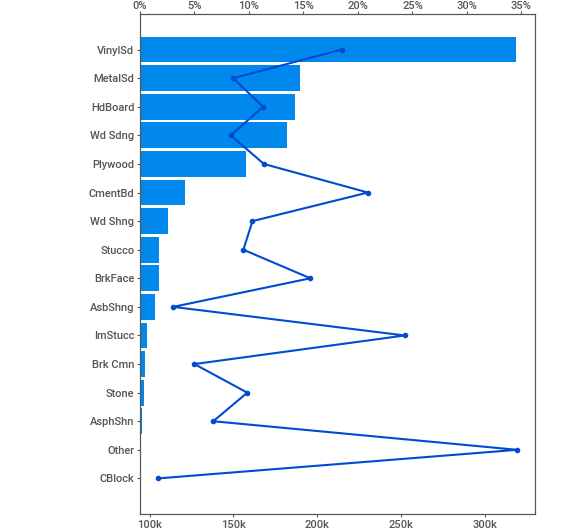
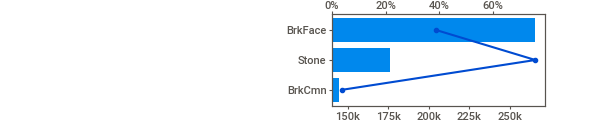
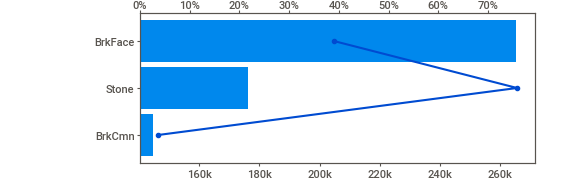
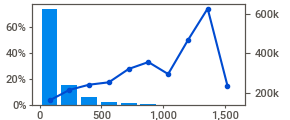
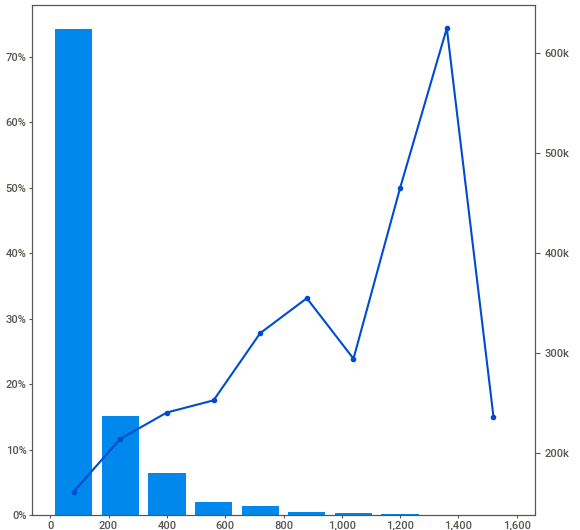
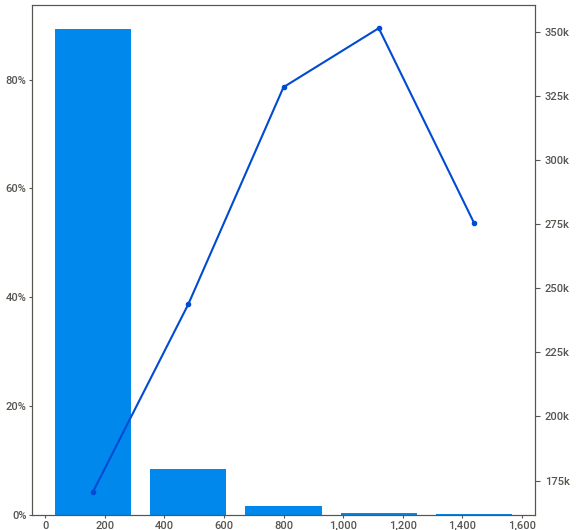
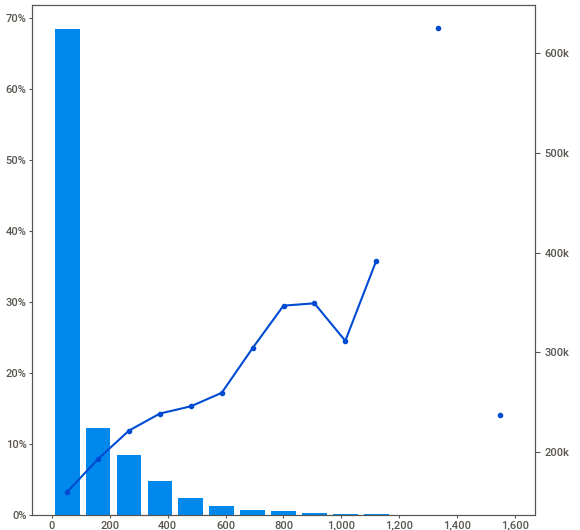
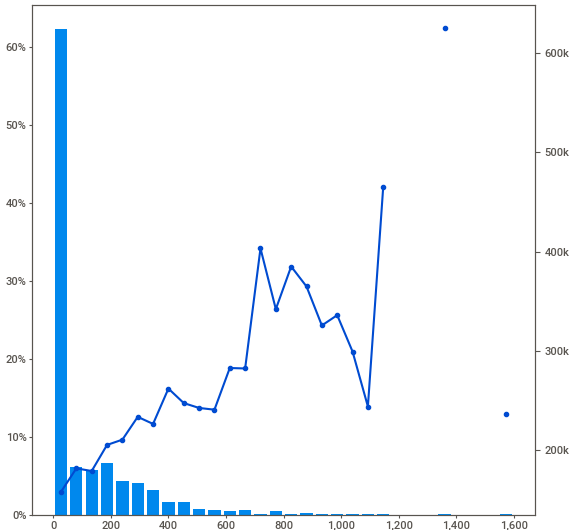
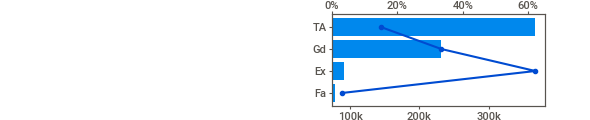
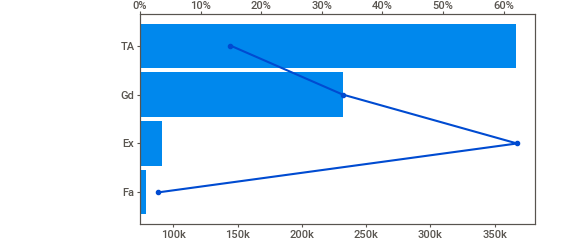
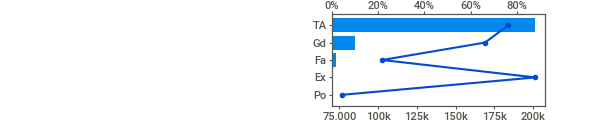
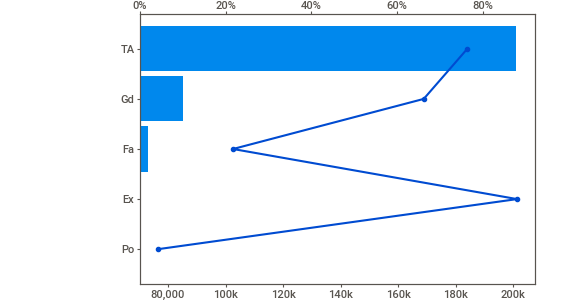
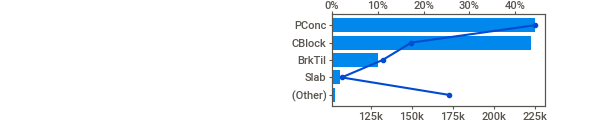
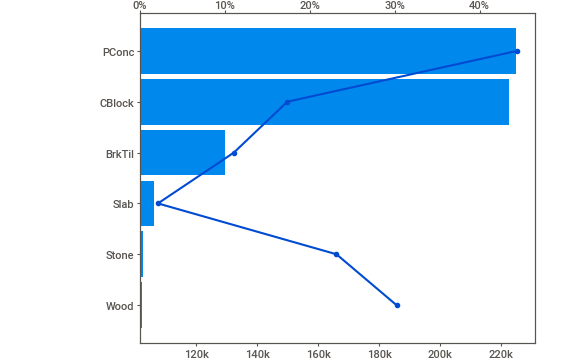
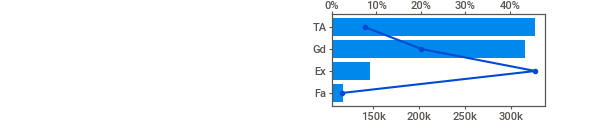
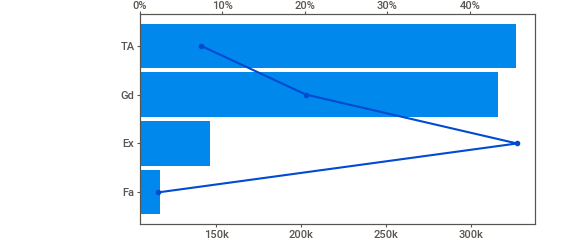
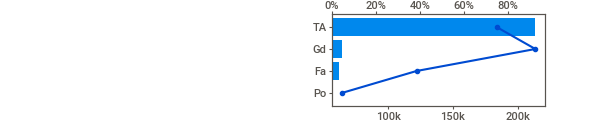
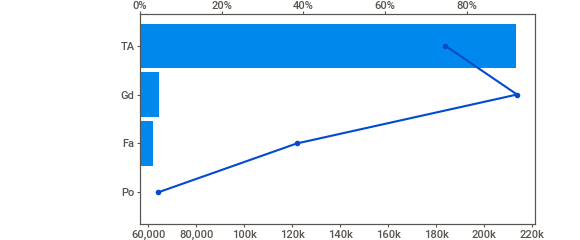
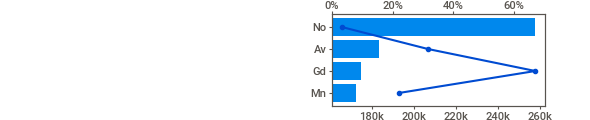
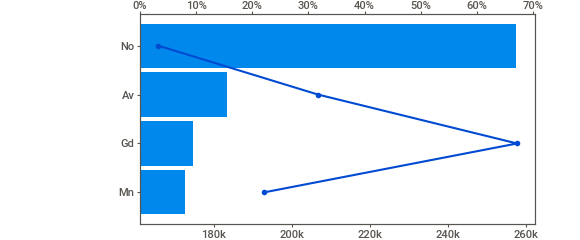
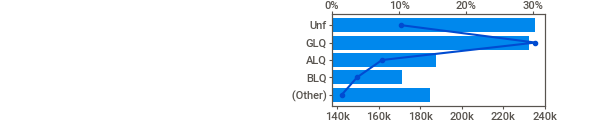
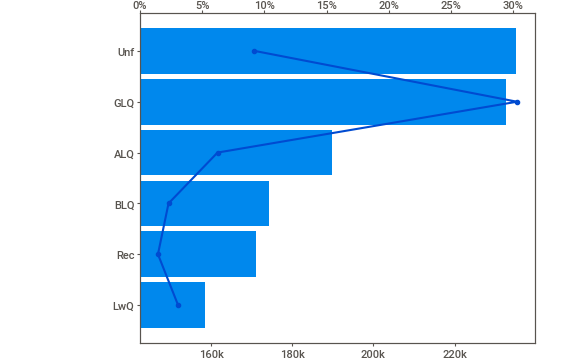
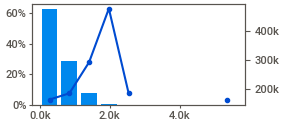
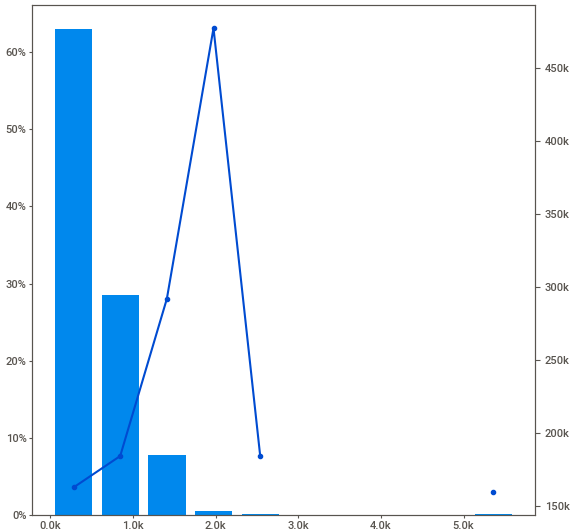
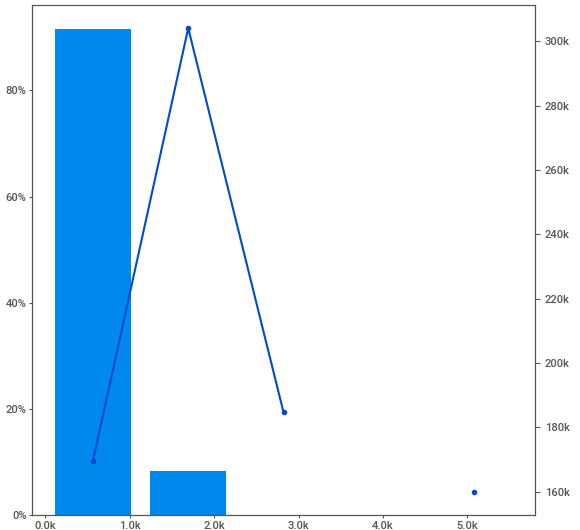
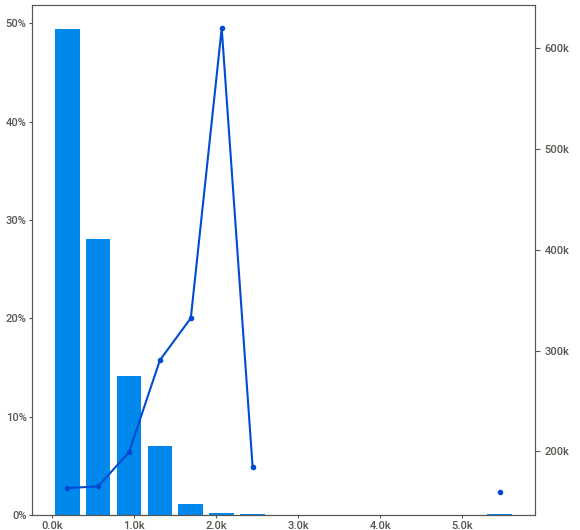
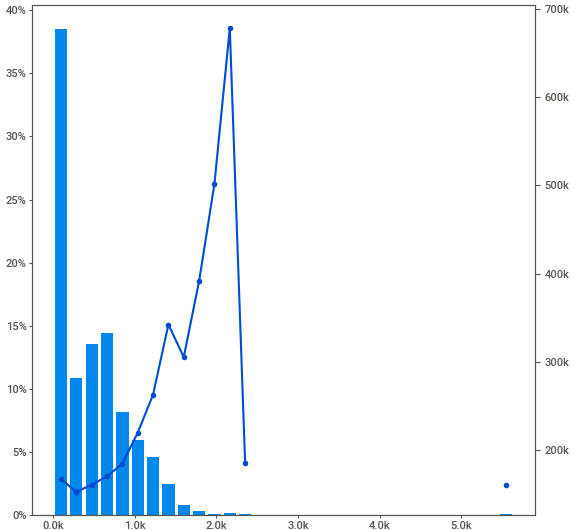
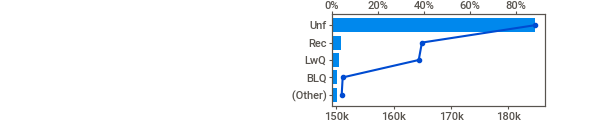
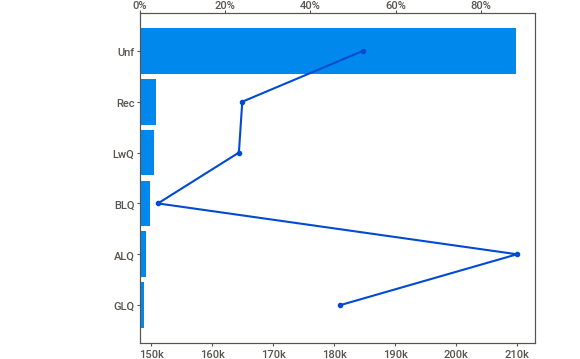
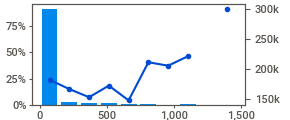
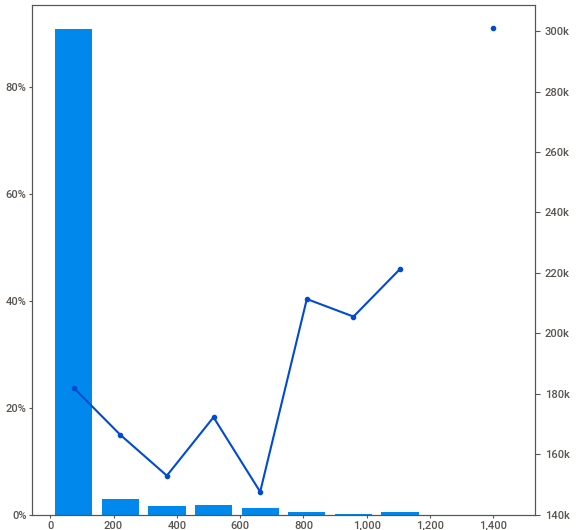
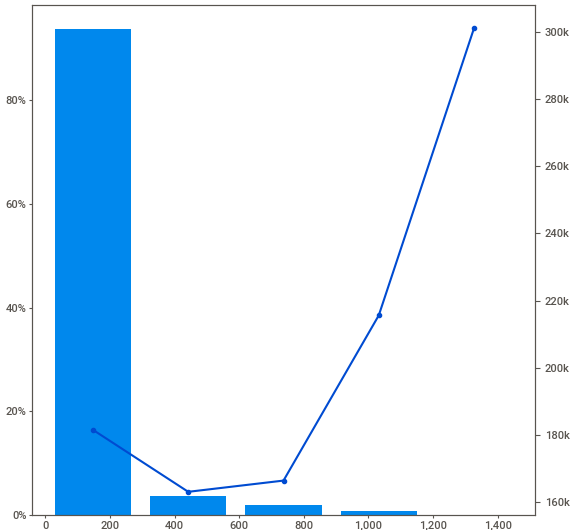
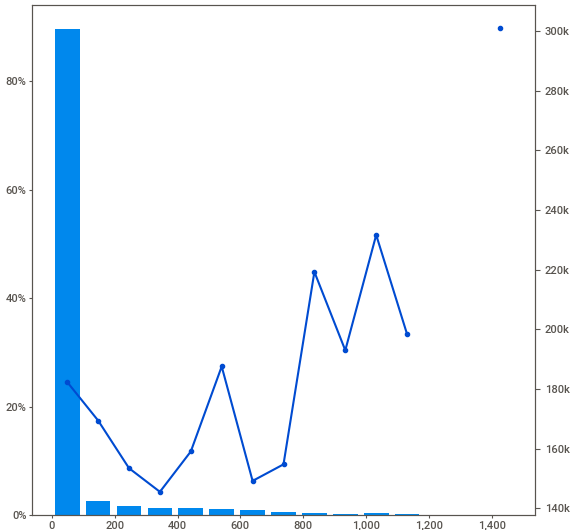
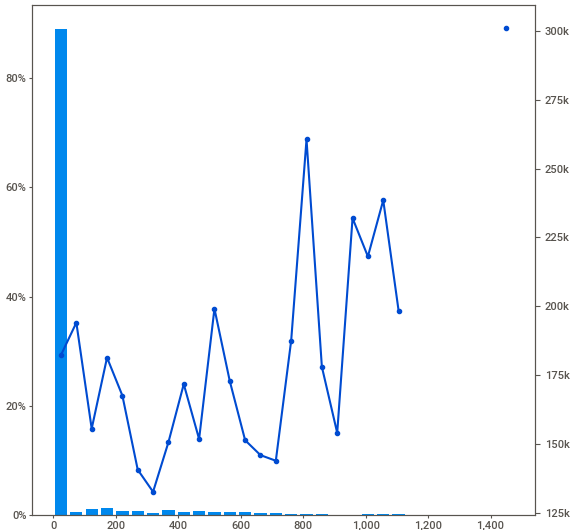
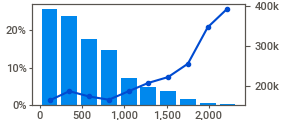
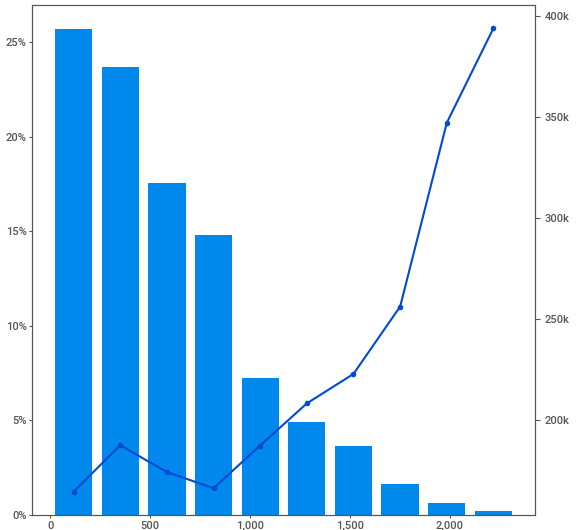
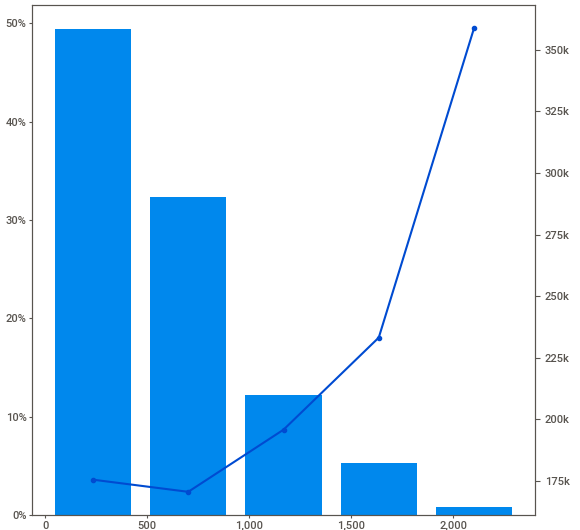
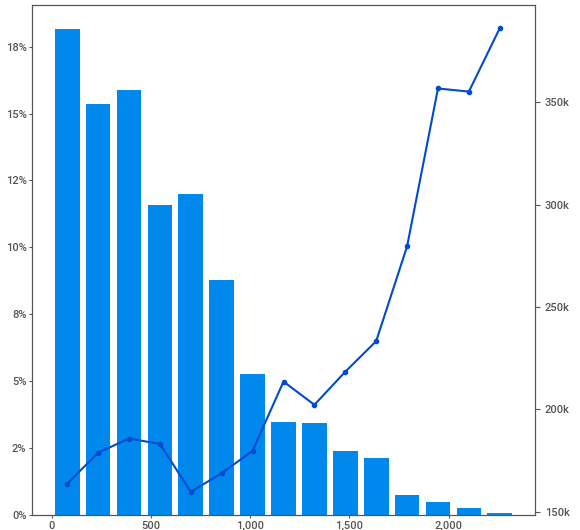
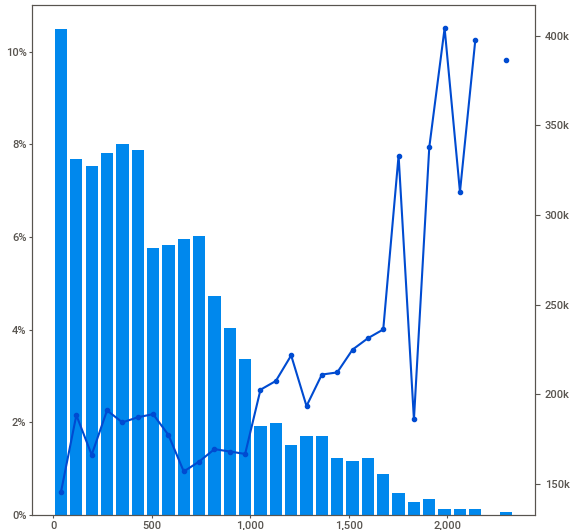
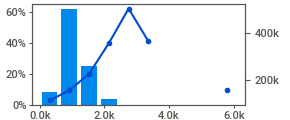
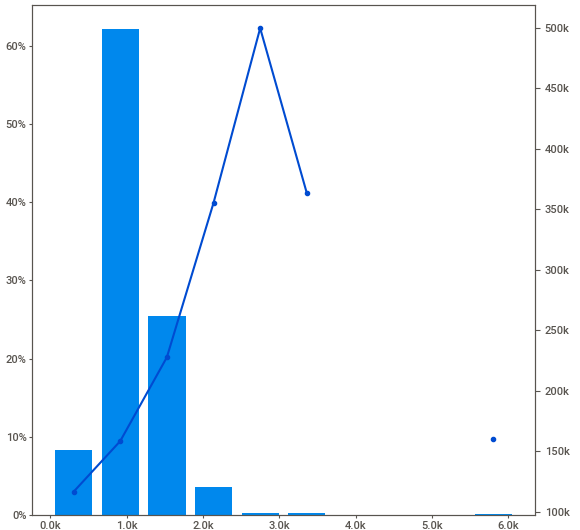
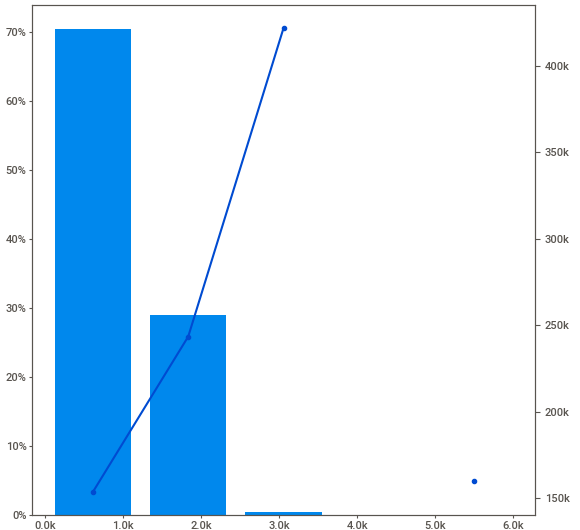
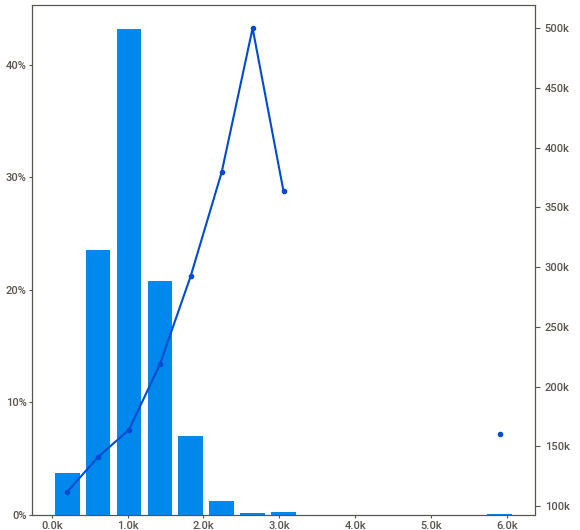
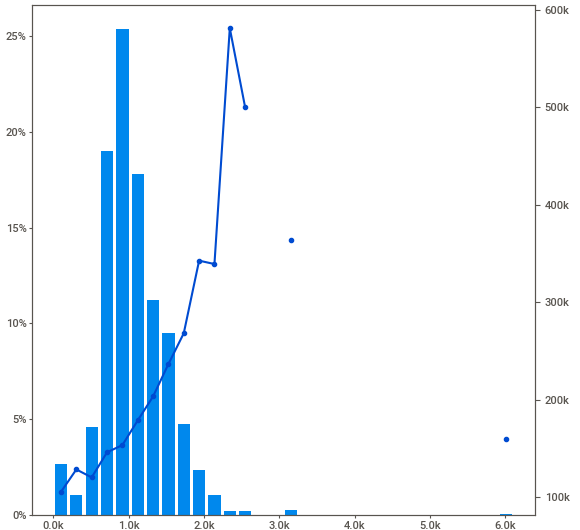
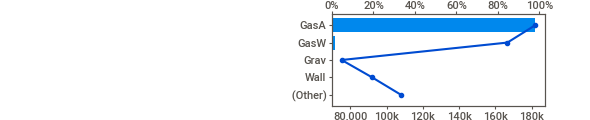
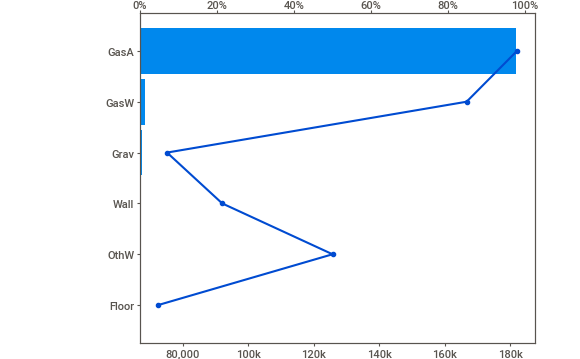
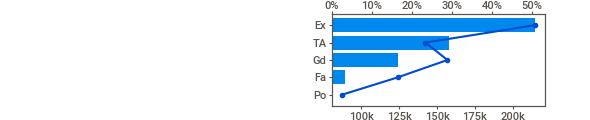
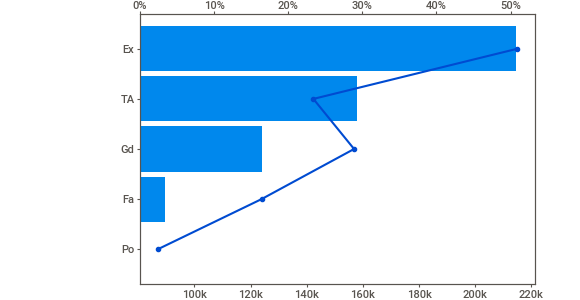
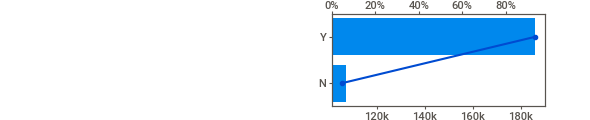
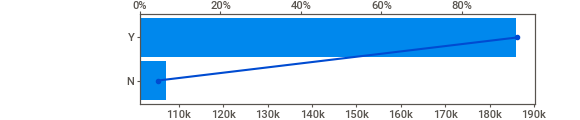
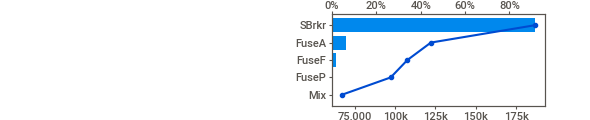
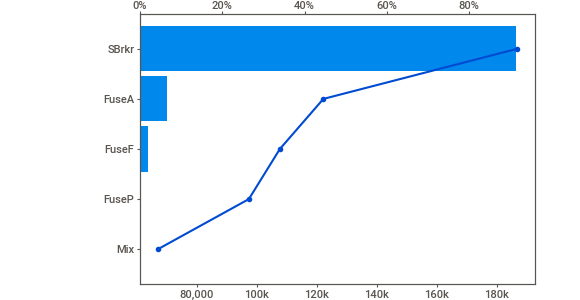
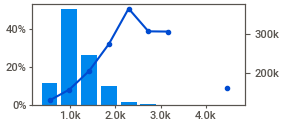
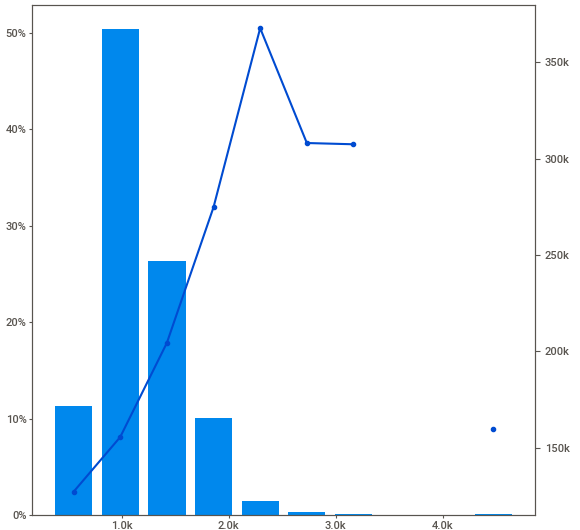
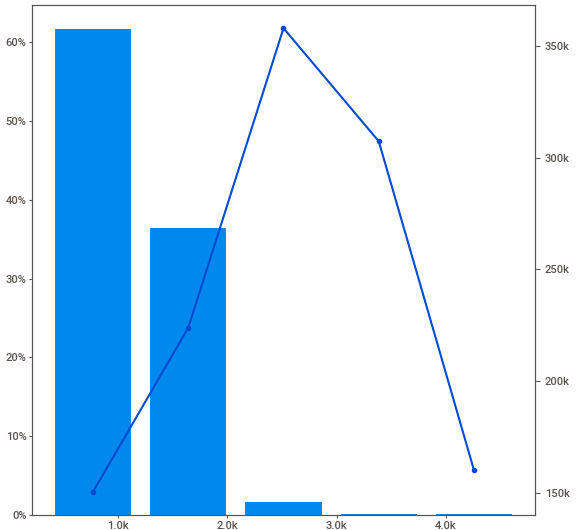
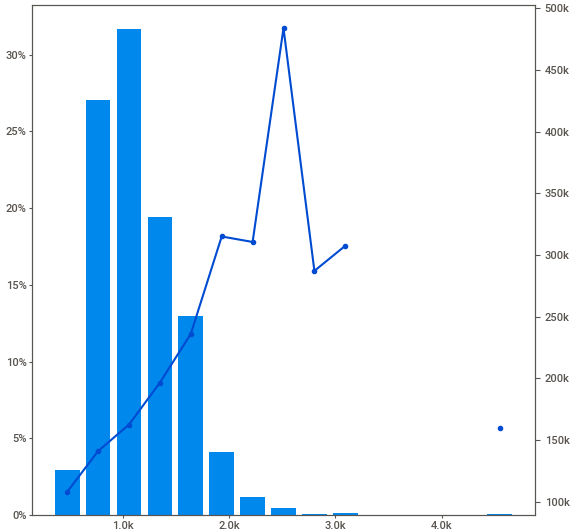
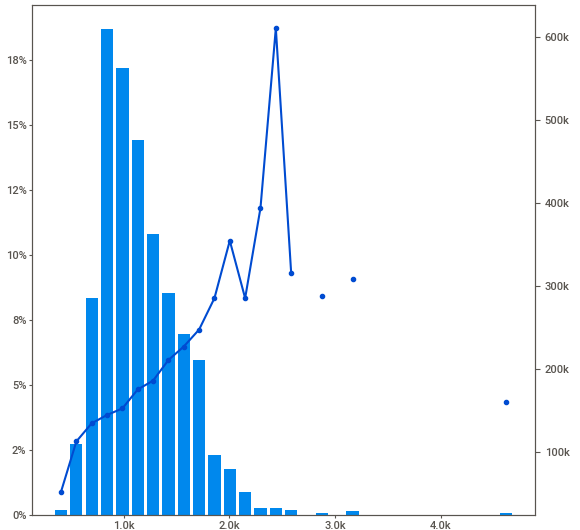
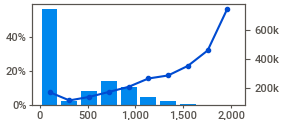
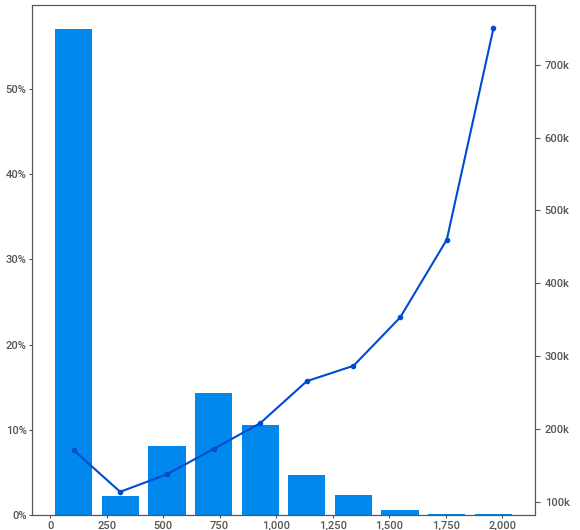
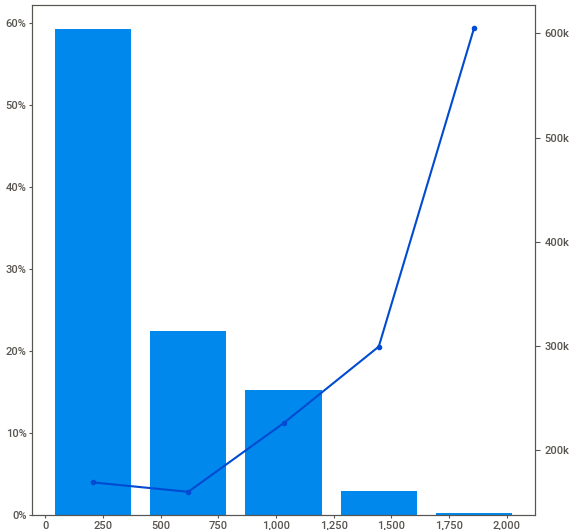
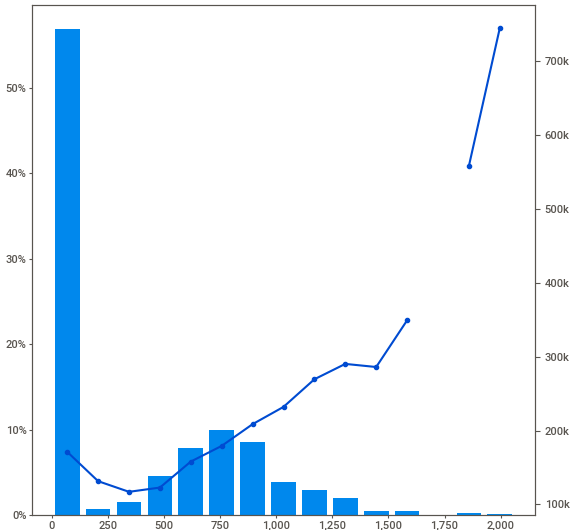
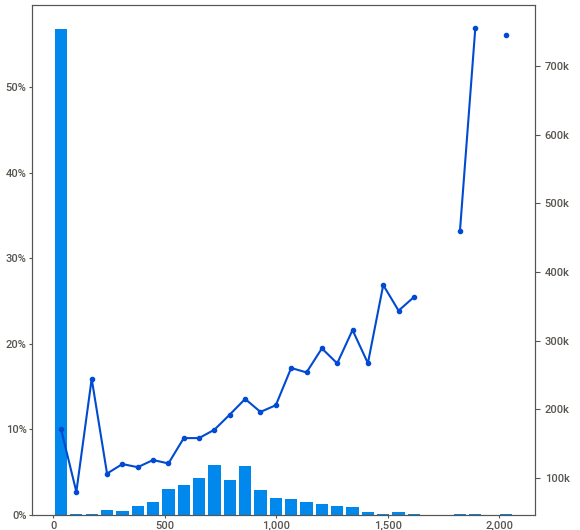
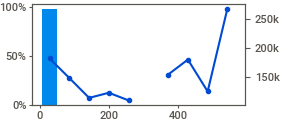
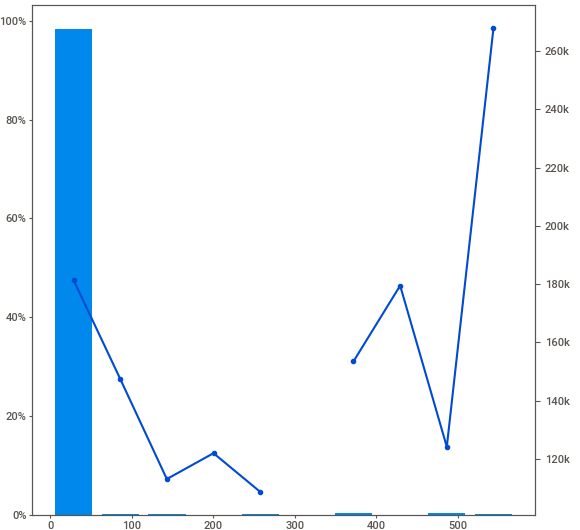
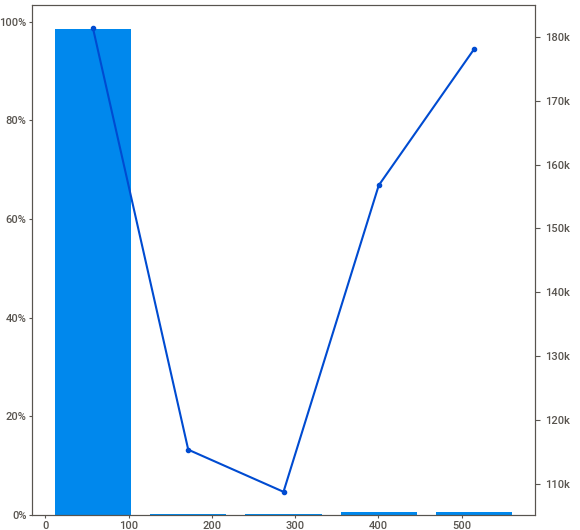
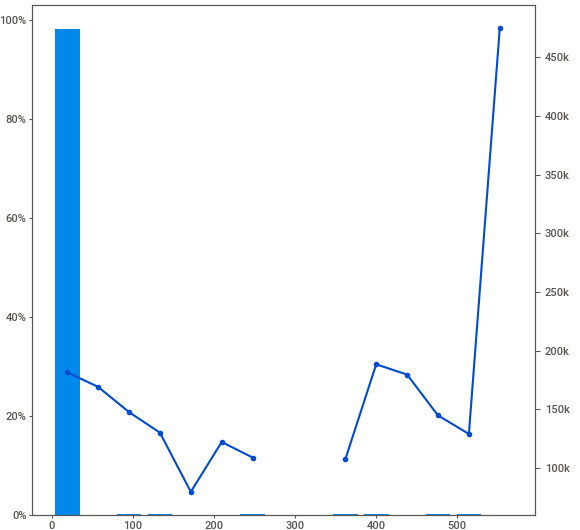
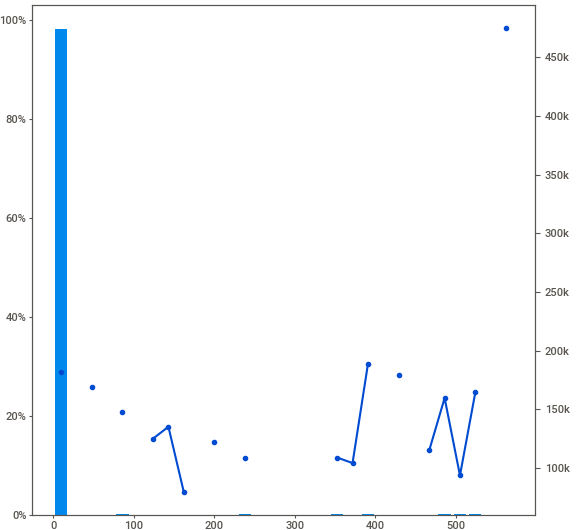
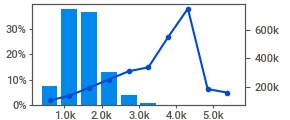
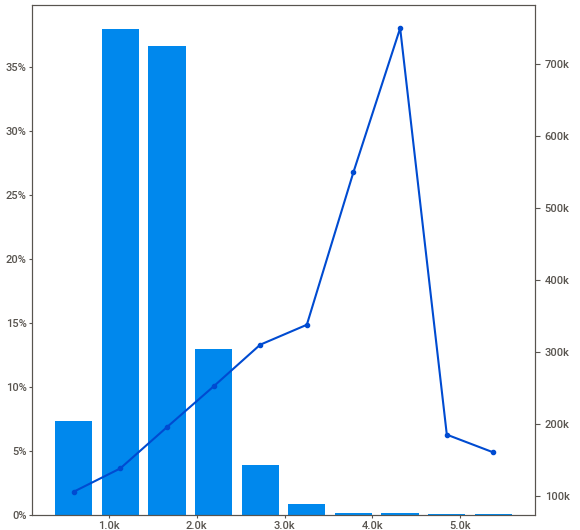
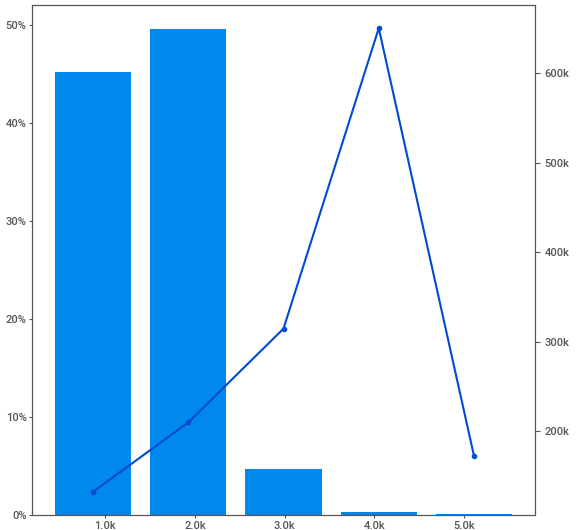
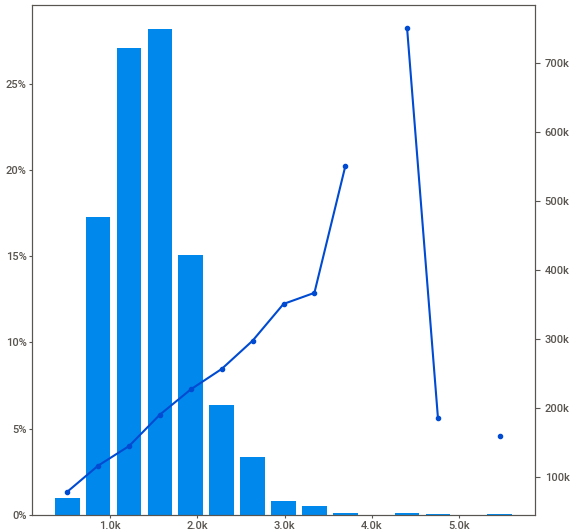
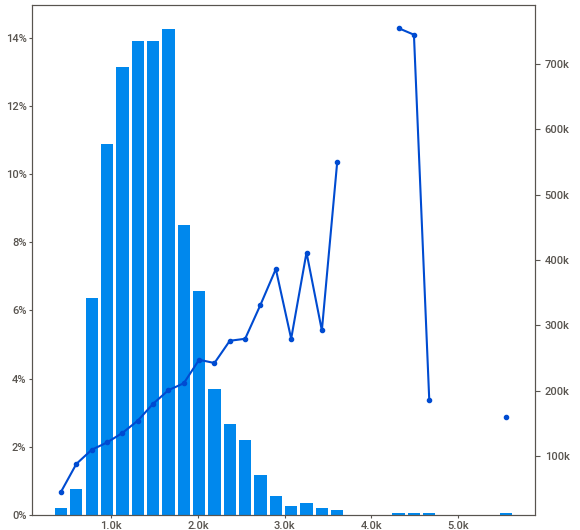
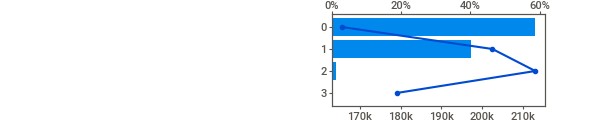
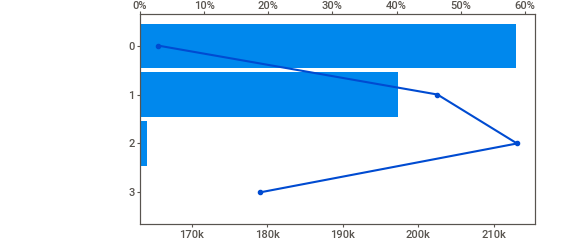
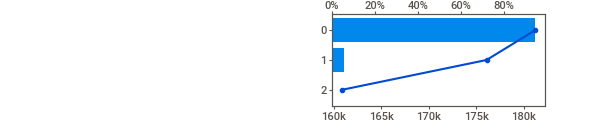
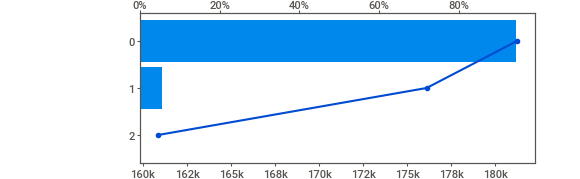
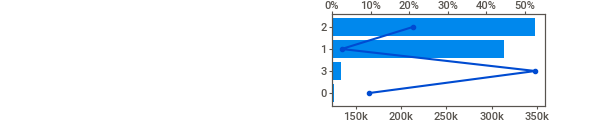
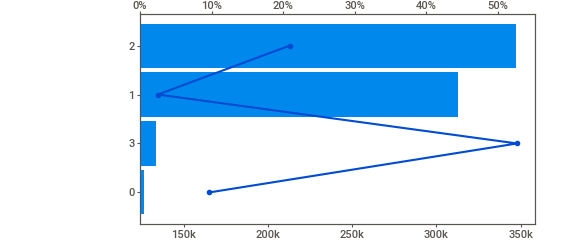
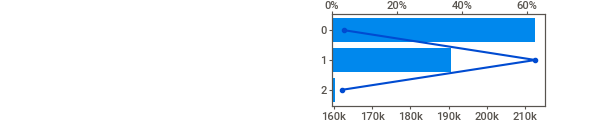
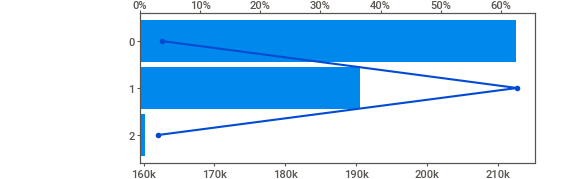
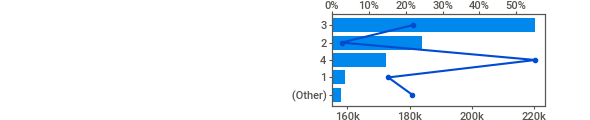
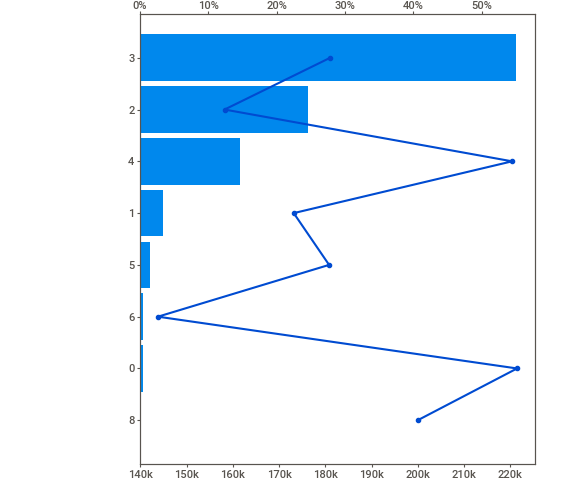
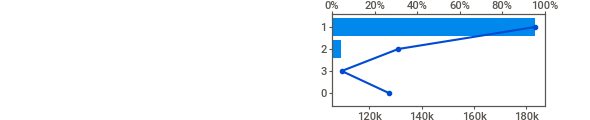
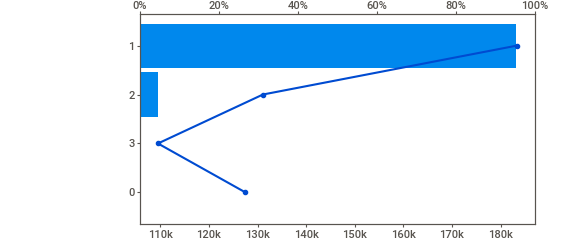
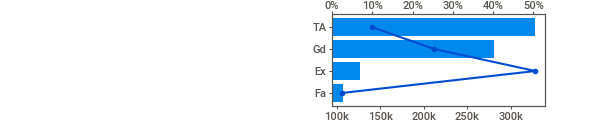
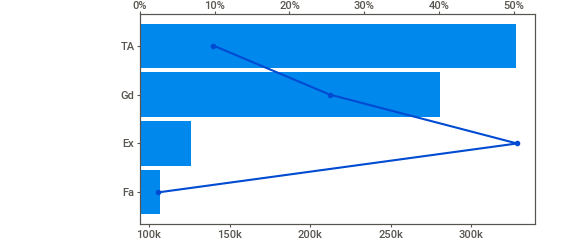
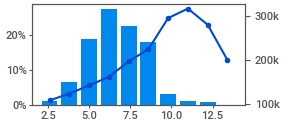
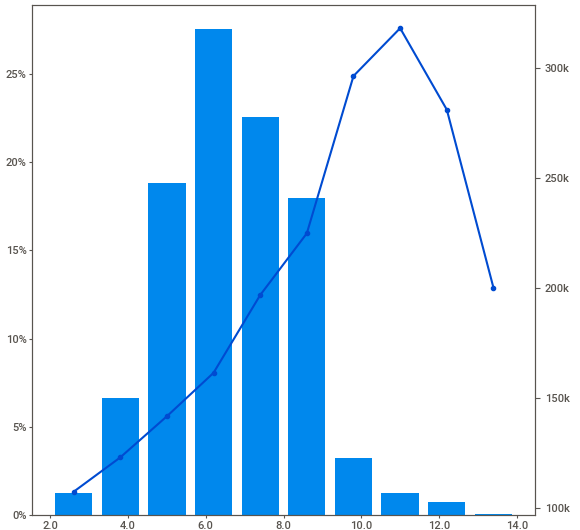
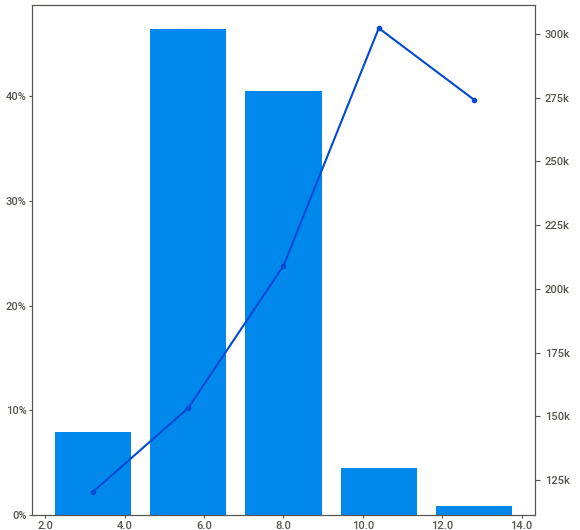
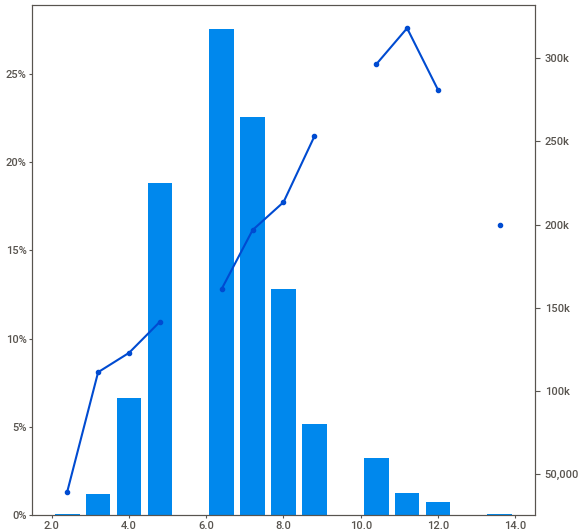
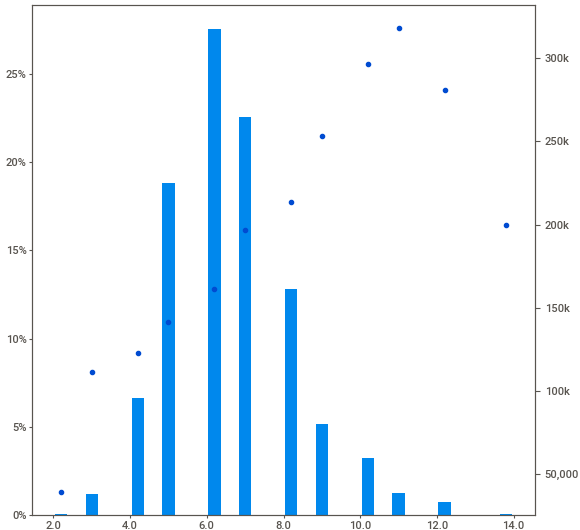
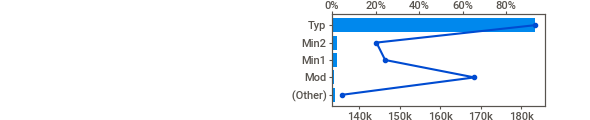
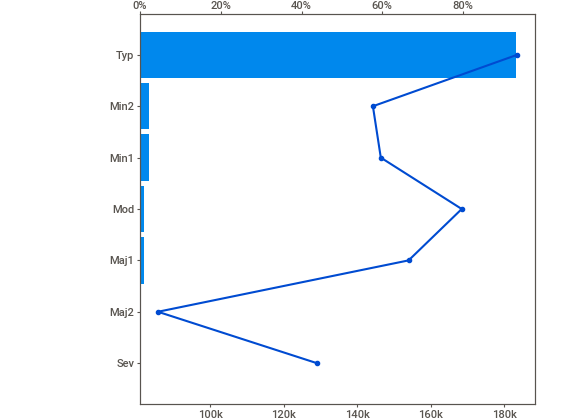
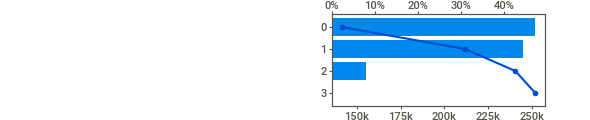
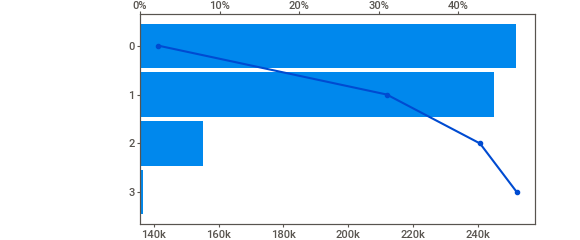
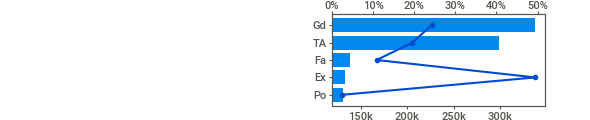
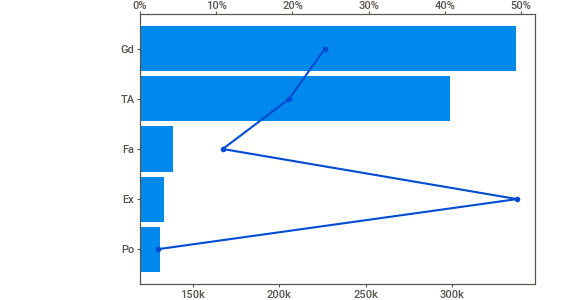
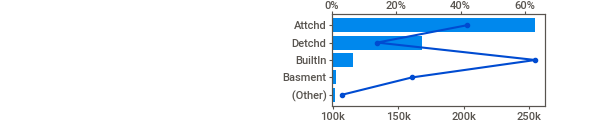
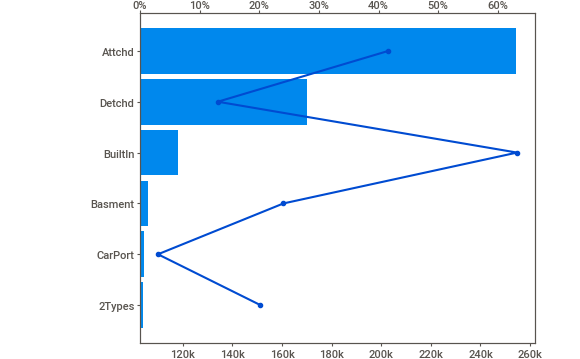
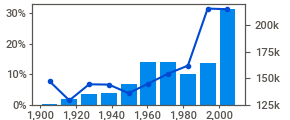
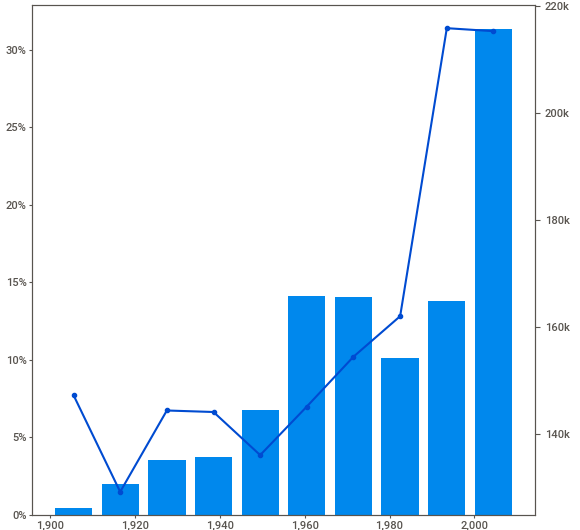
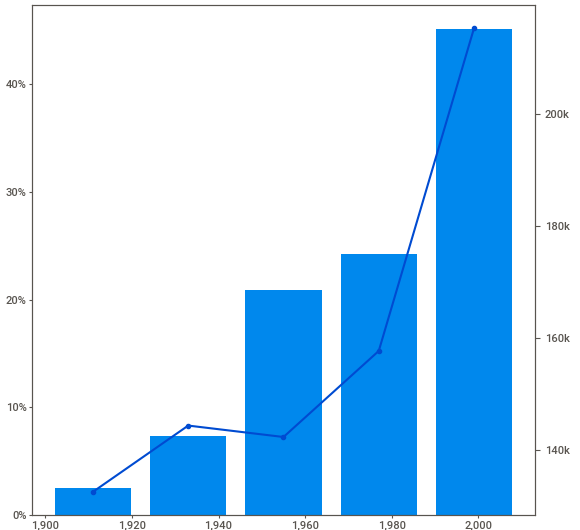
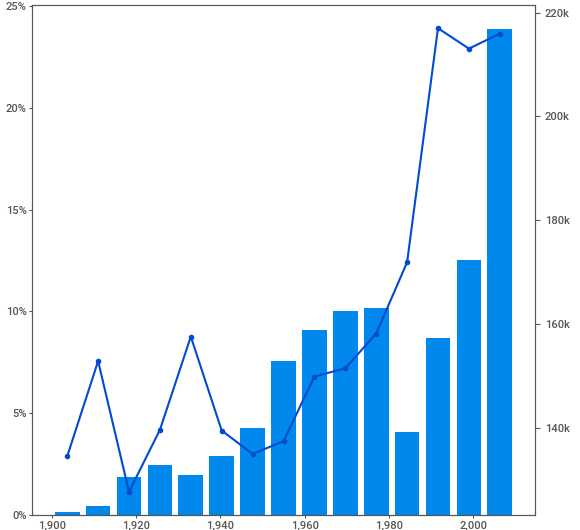
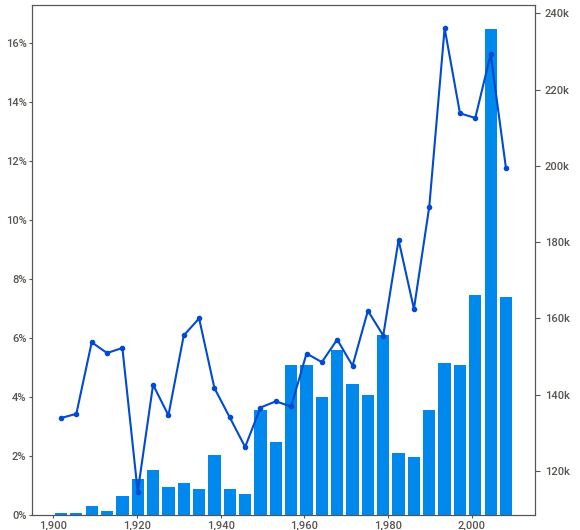
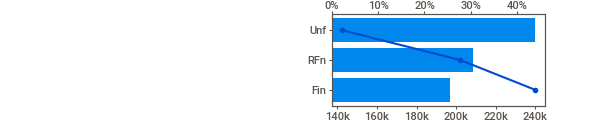
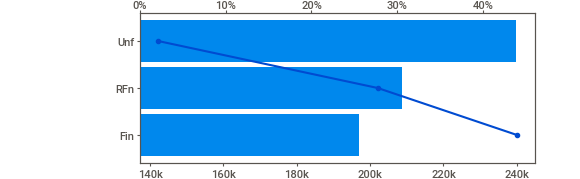
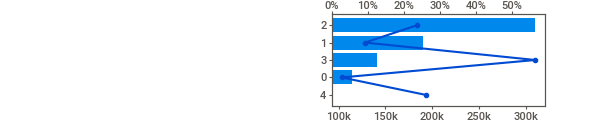
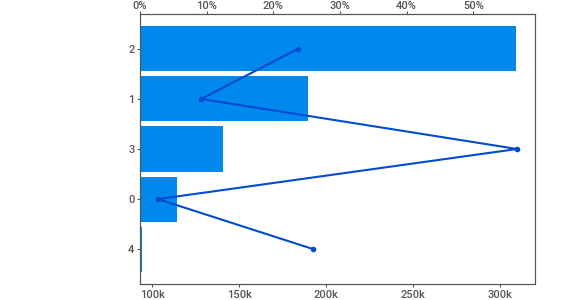
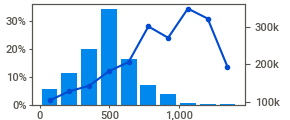
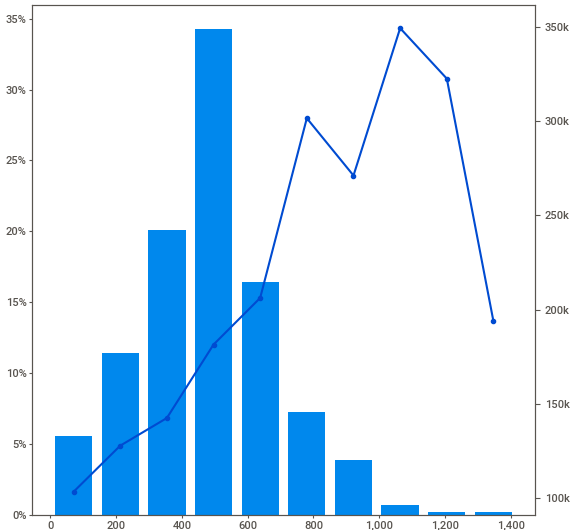
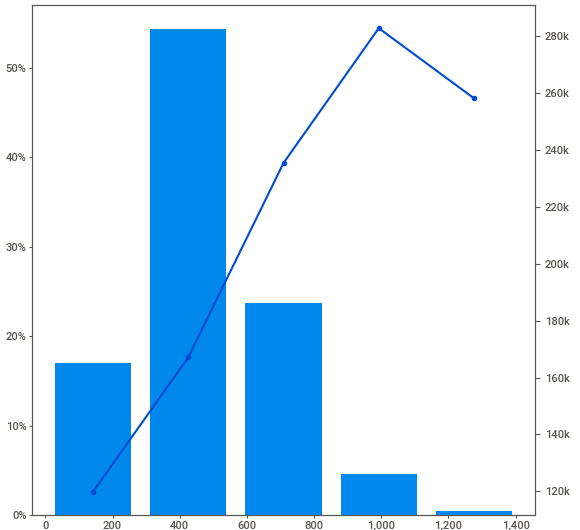
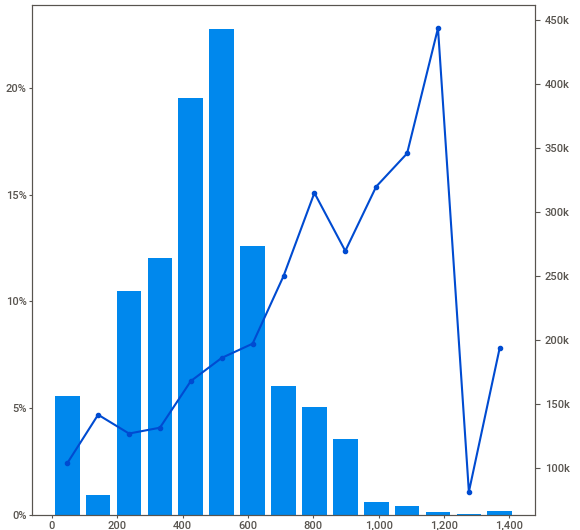
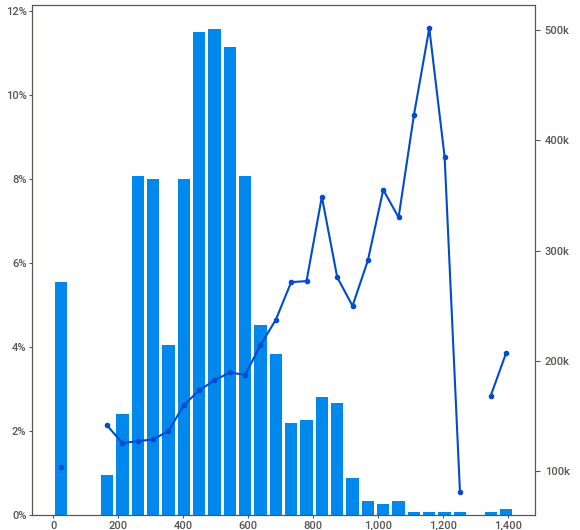
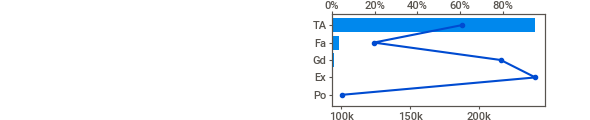
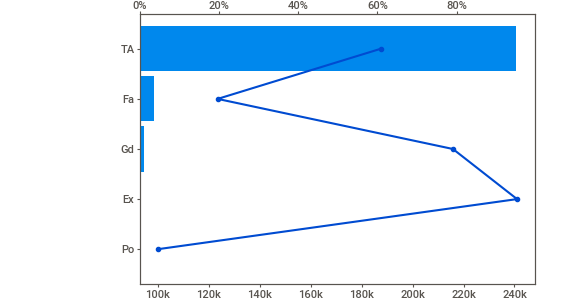
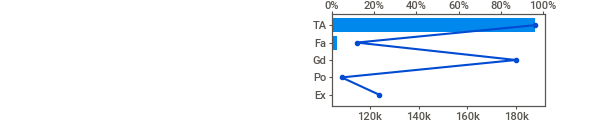
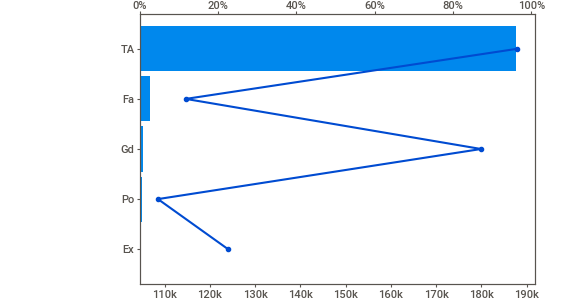
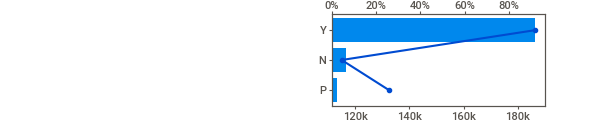
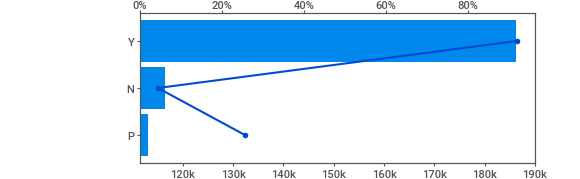
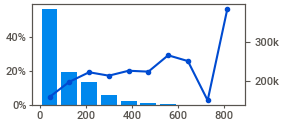
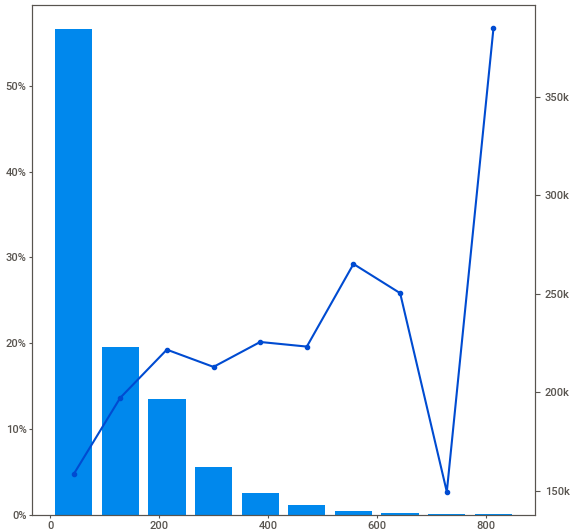
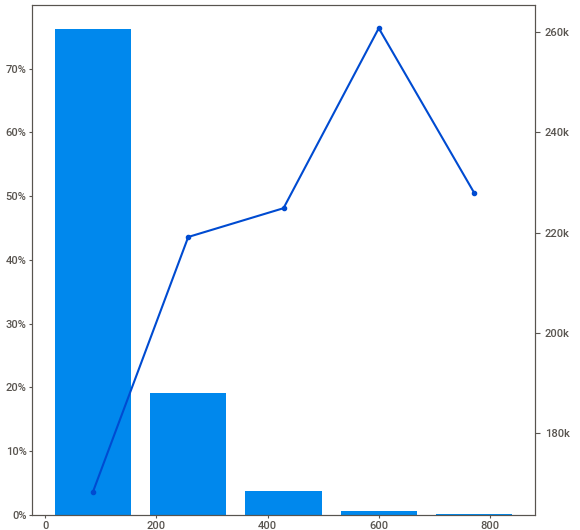
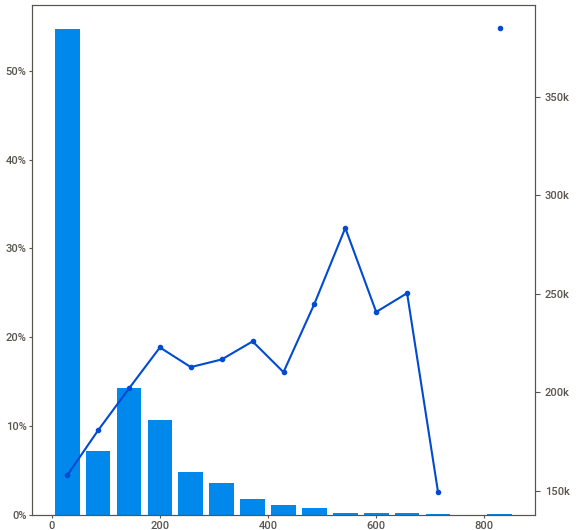
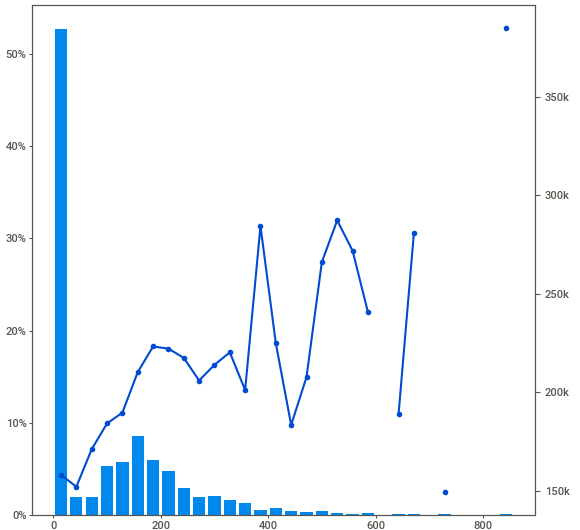
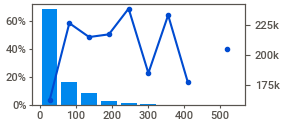
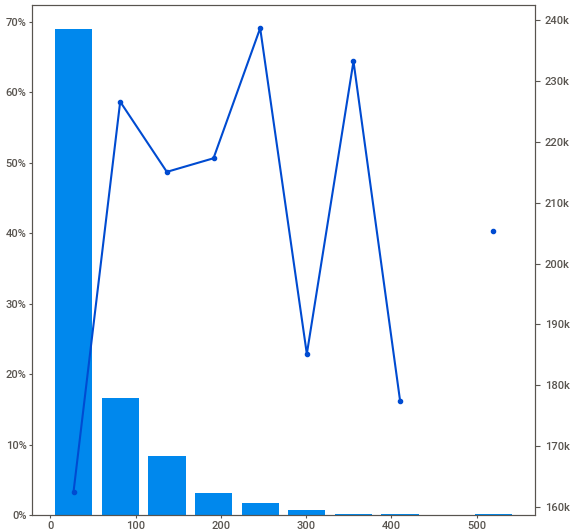
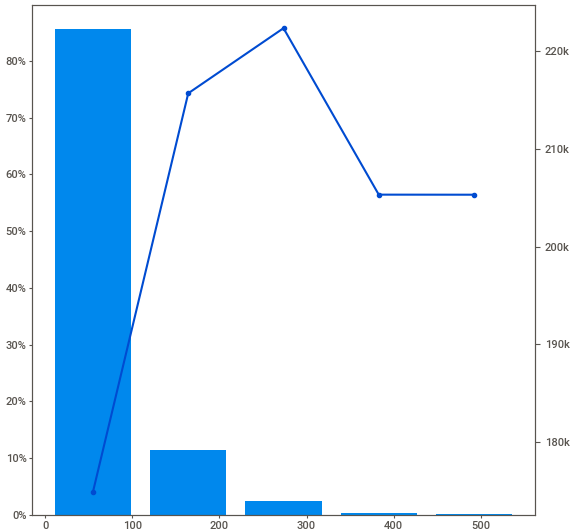
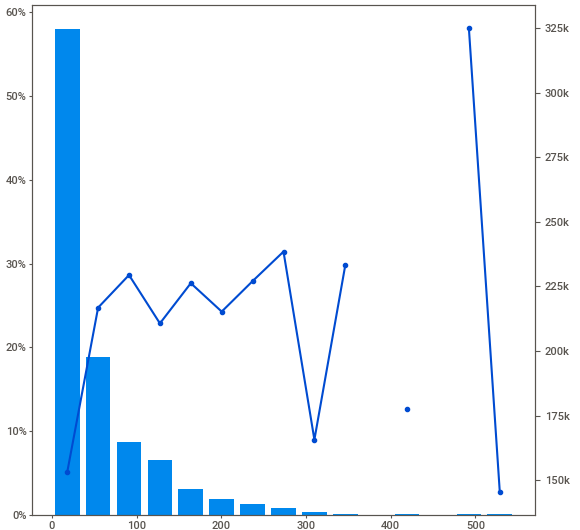
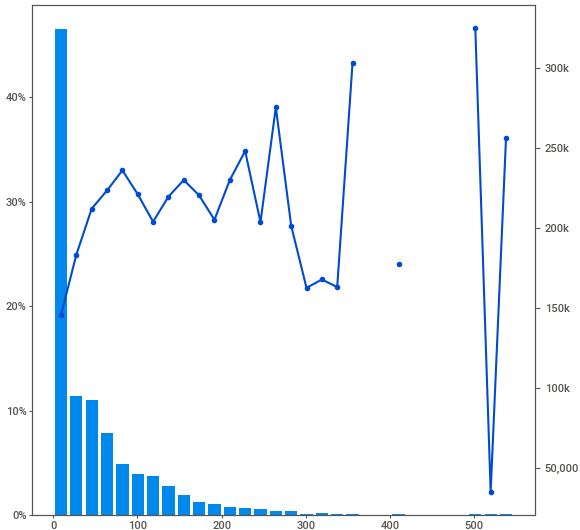
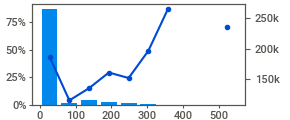
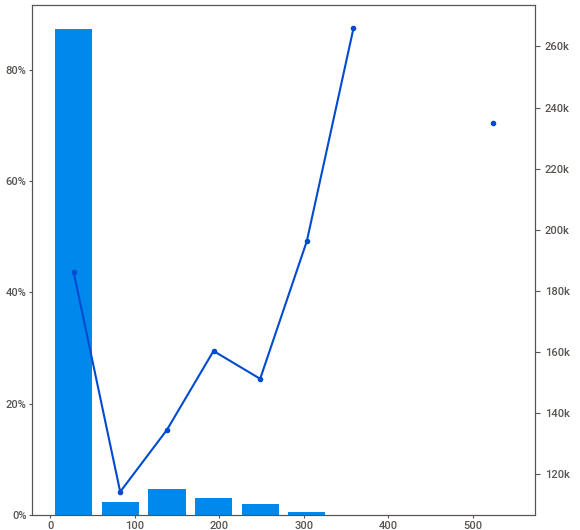
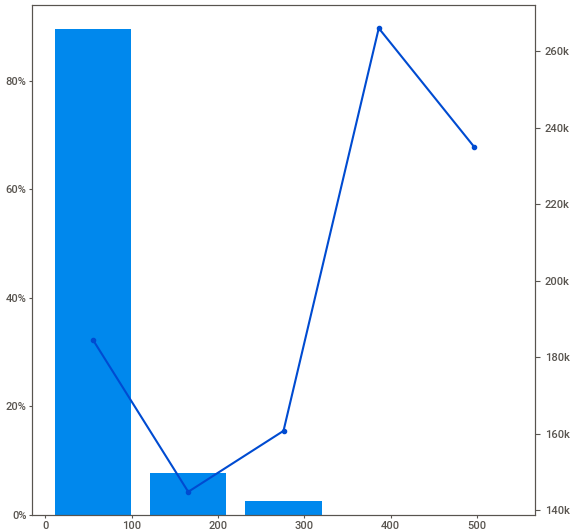
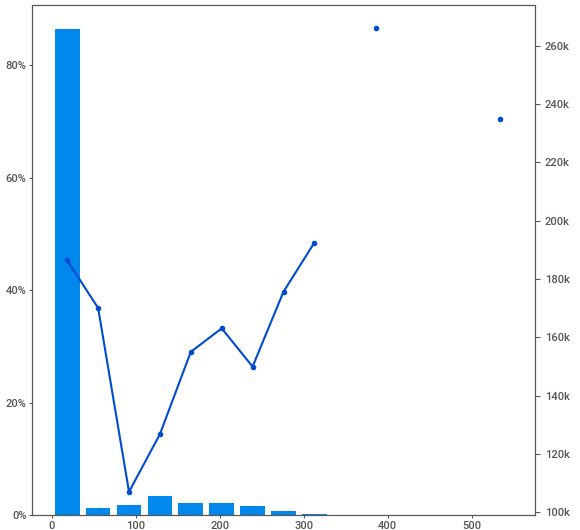
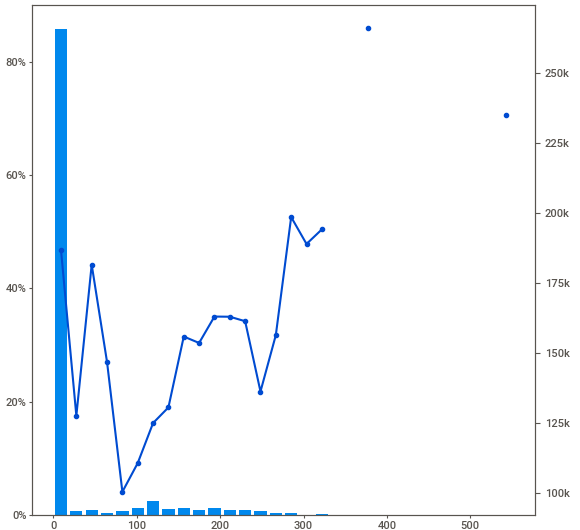
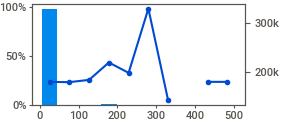
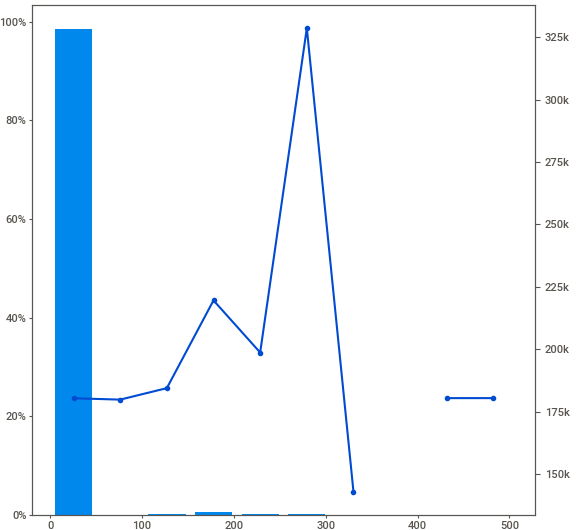
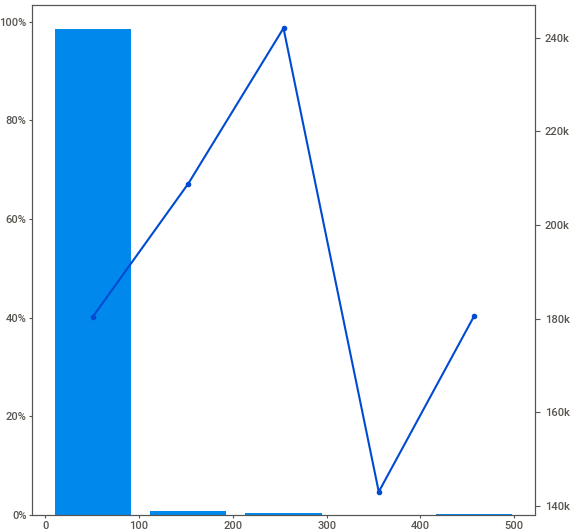
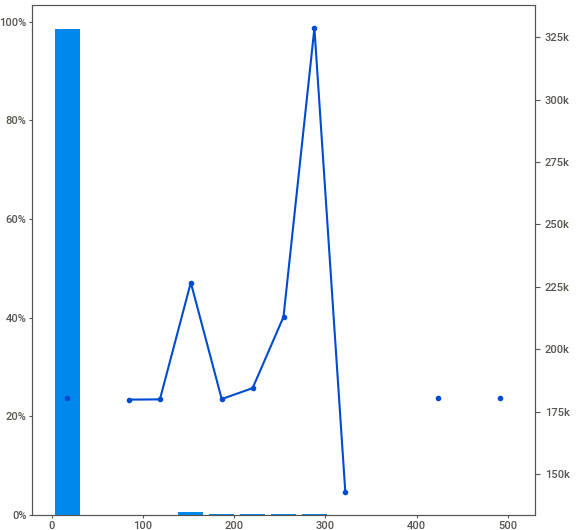
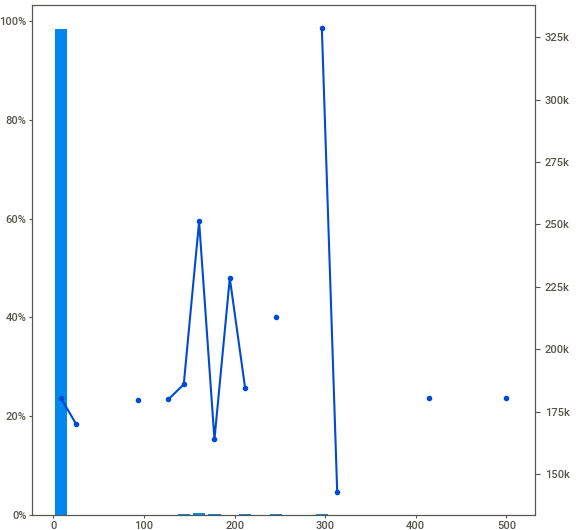
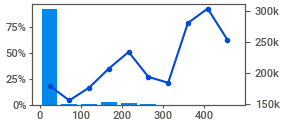
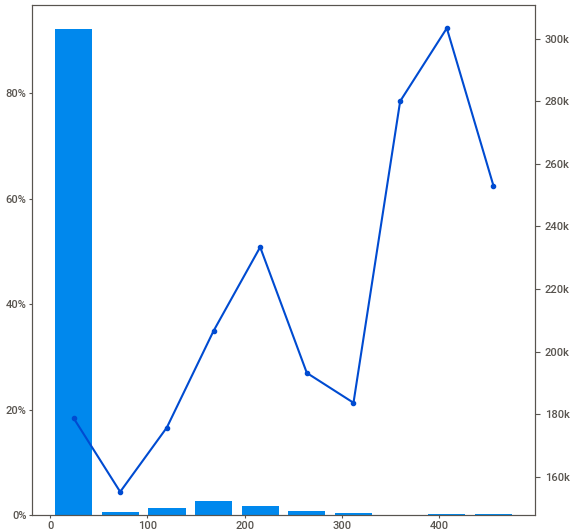
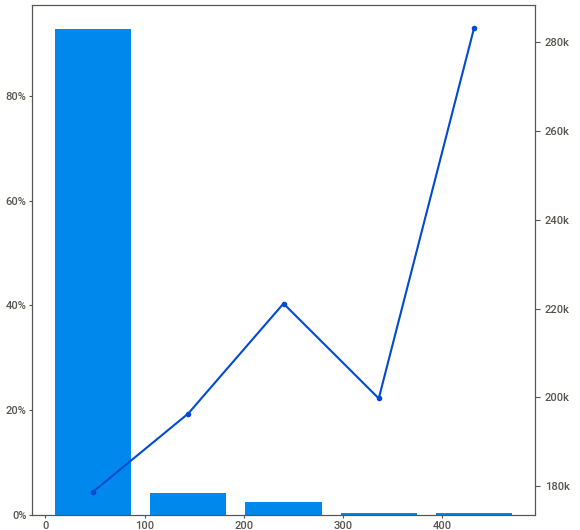
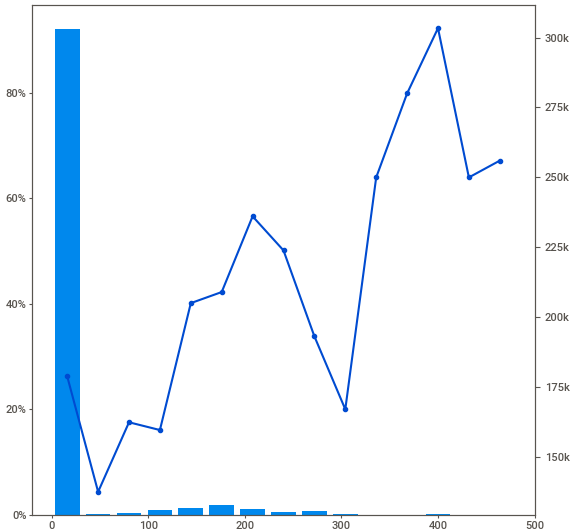
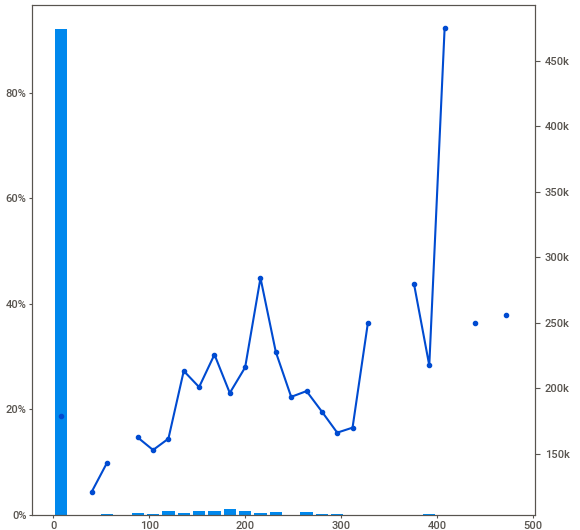
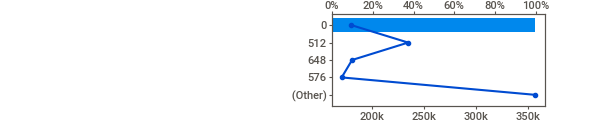
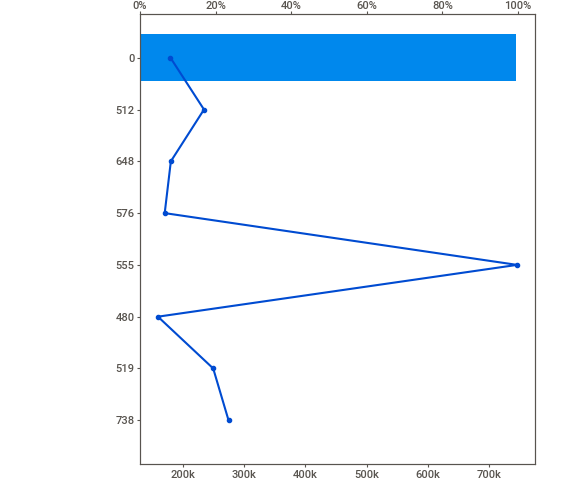
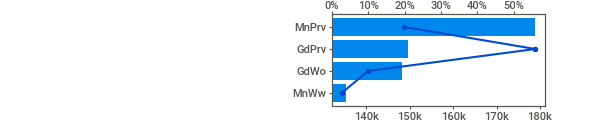
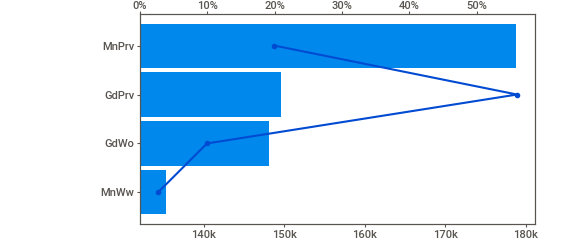
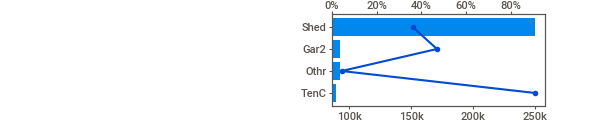
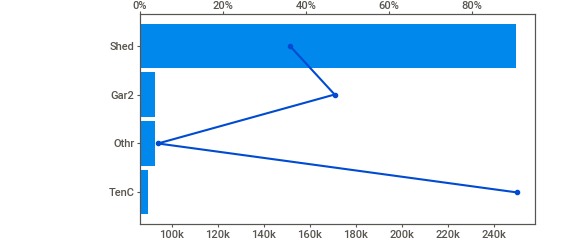
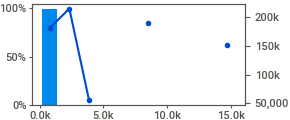
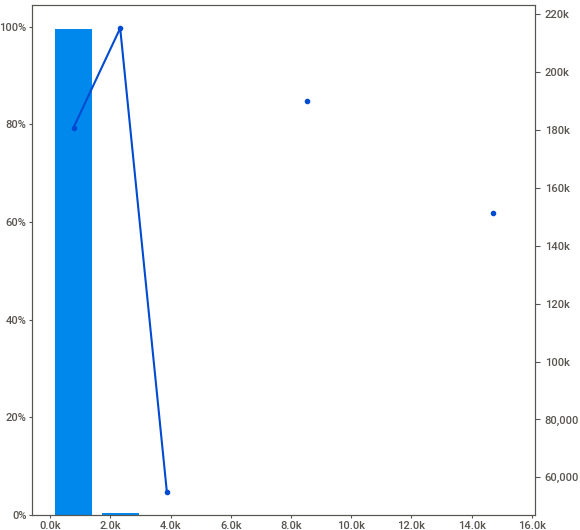
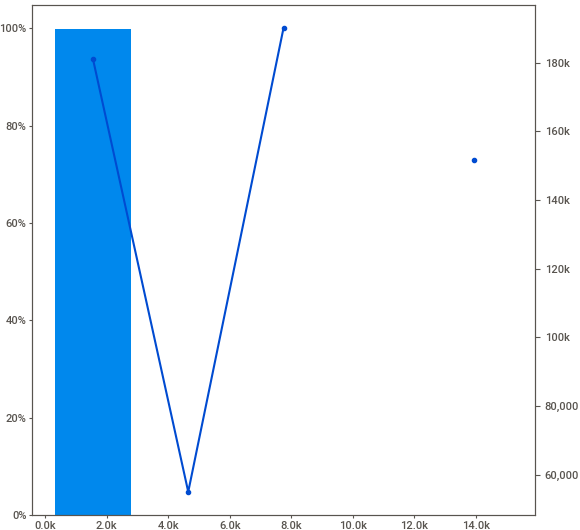
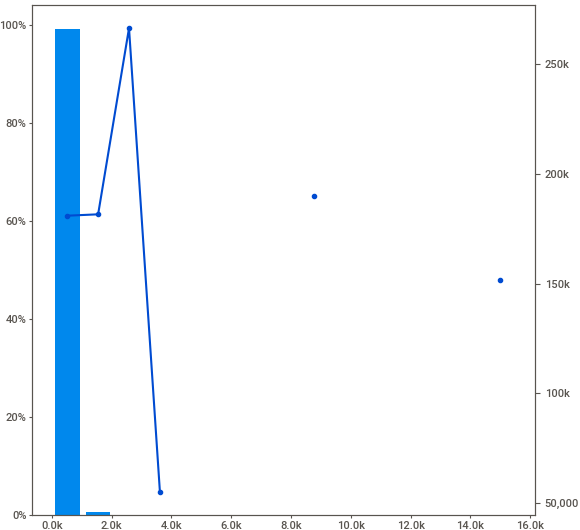
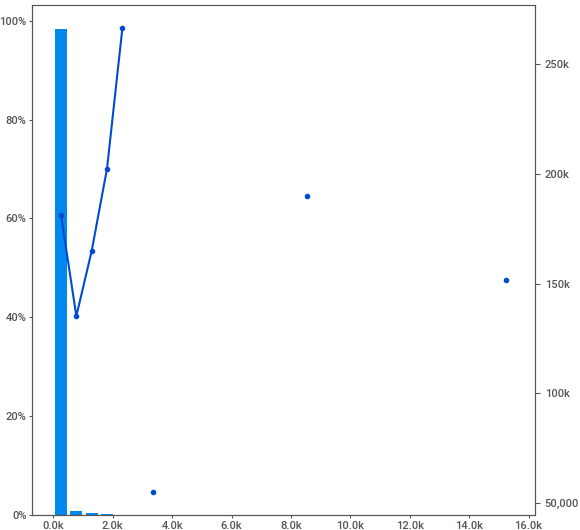
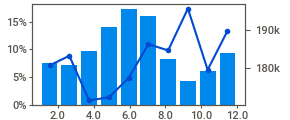
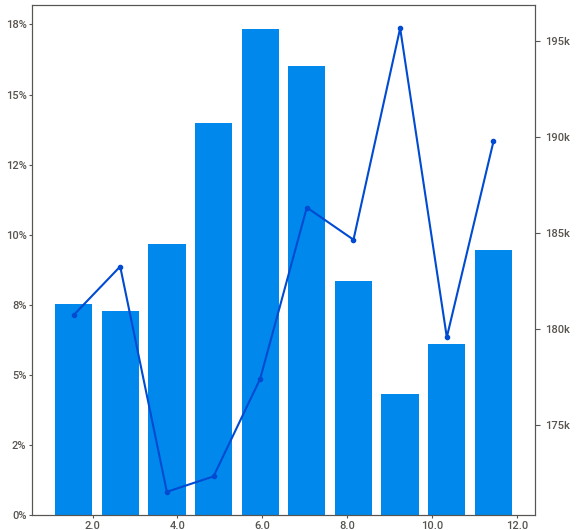
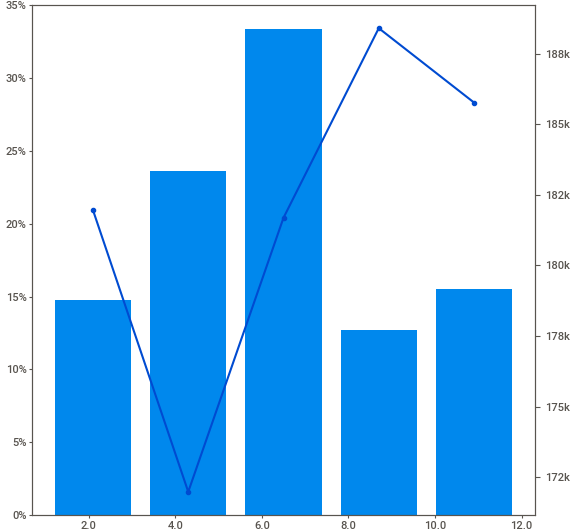
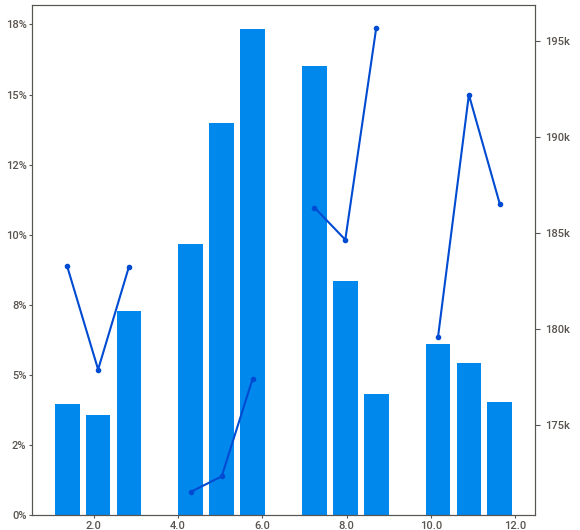
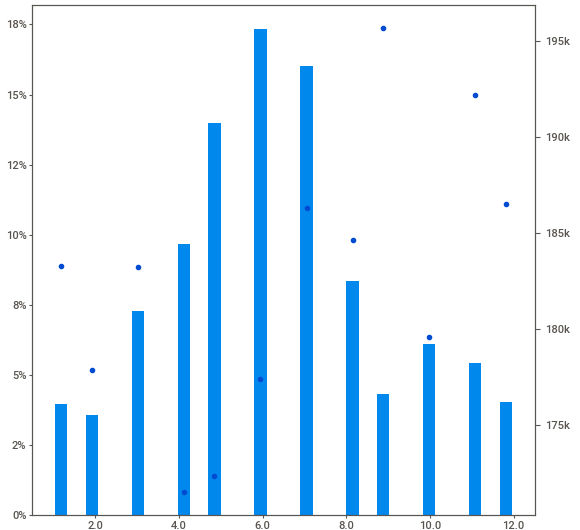
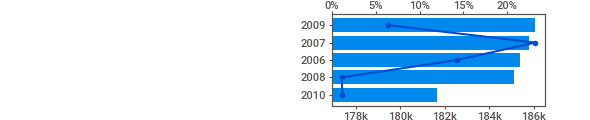
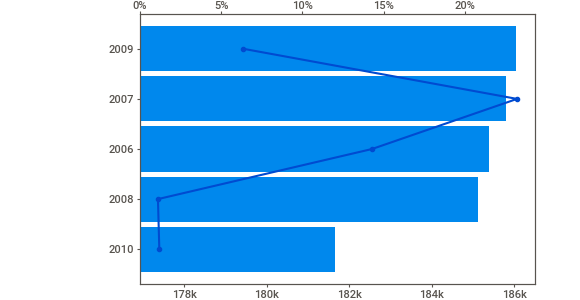
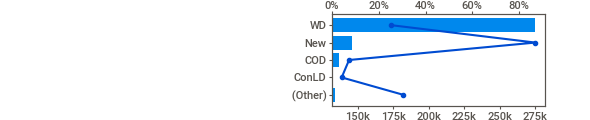
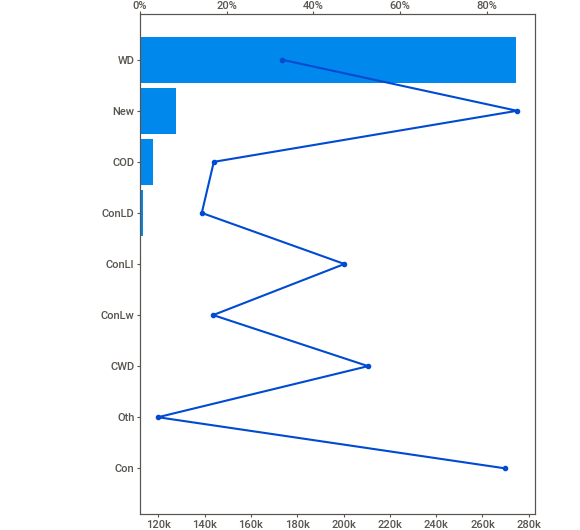
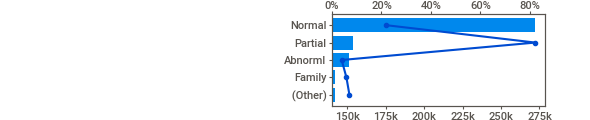
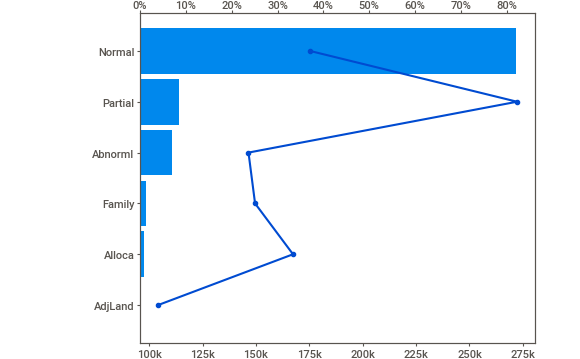
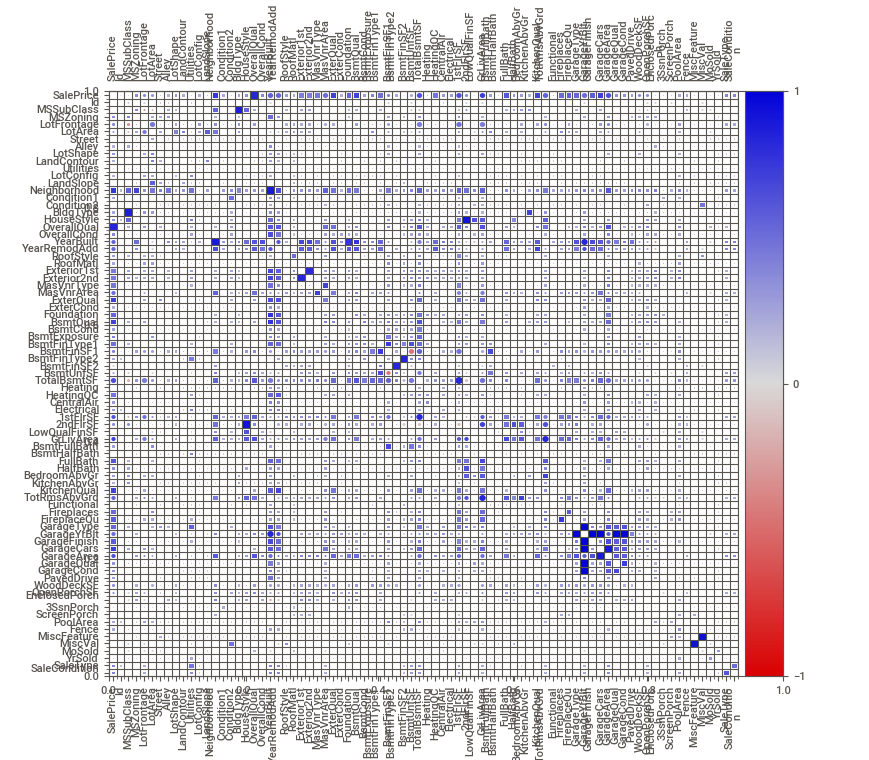
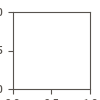

In [26]:
my_report = sv.analyze([df, "Train"],target_feat='SalePrice')
my_report.show_notebook(layout='vertical',w=880, h=700, scale = 0.8)

<b>Drop:</b> Alley, PoolQC, Fence, MiscFeature   <br><br>
<b>Fill:</b>  LotFrontage, MasVnrArea, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond,

In [28]:
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtFinType1']=df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])
df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])
df['GarageYrBlt']=df['GarageYrBlt'].fillna(df['GarageYrBlt'].mode()[0])
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])
df['FireplaceQu']=df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])

In [29]:
df.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)
df.dropna(inplace=True)

In [30]:
my_report = sv.analyze([df, "Train"],target_feat='SalePrice')

                                             |          | [  0%]   00:00 -> (? left)

In [ ]:
my_report.show_notebook(layout='vertical',w=880, h=700, scale = 0.8)

In [32]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 4.5 MB/s eta 0:00:00a 0:00:01


In [33]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

In [44]:
test_data = pd.read_csv('https://raw.githubusercontent.com/Fairtexas5/House_Predictor/refs/heads/main/csv/test.csv')

X_train = df.drop('SalePrice', axis=1)
y_train = df['SalePrice']

X_train_encoded = pd.get_dummies(X_train)
test_data_encoded = pd.get_dummies(test_data)

X_train_encoded, test_data_encoded = X_train_encoded.align(test_data_encoded, join='left', axis=1, fill_value=0)

X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_encoded, y_train, test_size=0.2, random_state=42)

In [46]:
model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3
)

model.fit(X_train_split, y_train_split)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [48]:
from sklearn.model_selection import GridSearchCV

model = xgb.XGBRegressor()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_split, y_train_split)

best_params = grid_search.best_params_

best_model = xgb.XGBRegressor(
    n_estimators=best_params['n_estimators'],
    learning_rate=best_params['learning_rate'],
    max_depth=best_params['max_depth']
)

In [49]:
best_model.fit(X_train_encoded, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [50]:
val_predictions = best_model.predict(X_val_split)

mae = mean_absolute_error(y_val_split, val_predictions)
mse = mean_squared_error(y_val_split, val_predictions)
rmse = mse**0.5

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

mape = (1/len(y_val_split)) * np.sum(np.abs((y_val_split - val_predictions) / y_val_split)) * 100
mspe = (1/len(y_val_split)) * np.sum(((y_val_split - val_predictions)**2 / y_val_split**2)) * 100
rmspe = np.sqrt(mspe)

print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')
print(f'Mean Squared Percentage Error (MSPE): {mspe:.2f}%')
print(f'Root Mean Squared Percentage Error (RMSPE): {rmspe:.2f}%')

Mean Absolute Error: 8366.531651327055
Mean Squared Error: 124872915.42079277
Root Mean Squared Error: 11174.655047060414
Mean Absolute Percentage Error (MAPE): 5.19%
Mean Squared Percentage Error (MSPE): 0.56%
Root Mean Squared Percentage Error (RMSPE): 0.75%


In [51]:
best_model.fit(X_train_encoded, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [52]:
test_predictions = best_model.predict(test_data_encoded)

In [53]:
submission_df = pd.DataFrame({'Id': test_data['Id'], 'SalePrice': test_predictions})

In [54]:
submission_df.to_csv('house_price_predictions.csv', index = False)